In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Создает линейно раздяляемый датасет с заданным параметрически уравнением прямой

def make_separatable(n=2,line=[1,1,2,-5], tres = 1):

    dataset = np.empty([1,n+2])

    line = np.array(line)

    for i in range(200):
        point = np.append(10*np.random.normal(size=(1,n)),1)

        if (np.dot(line.T, point)) > tres: 
            dataset = np.vstack((dataset, np.append(point, 1)))
        if (np.dot(line.T, point)) < -tres: dataset = np.vstack((dataset, np.append(point, 0)))

    return dataset[:,0:n+1], dataset[:,n+1]

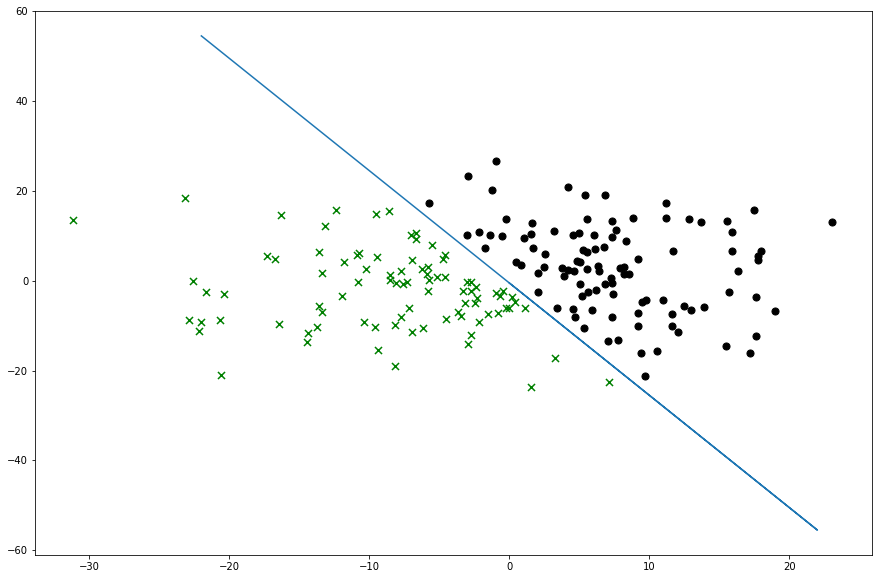

In [256]:
# Исходный датасет и разделяющая прямая

line = np.array([2,5, 1])

data, target = make_separatable(n=2,line=line, tres=5)

def line_points(line, m, n):
    x = np.append(np.arange(m/4), -np.arange(m/4))
    y = -(x*line[1:n]+line[n])/line[0]
    return x, y

def plot(line, data, target, n):
    fig = plt.figure(figsize = (15,10))

    x,y = line_points(line, data[:,1].max(), n)
    plt.scatter(data[target==0][:,1],data[target==0][:,0], marker='x', s=50, c='g')
    plt.scatter(data[target==1][:,1],data[target==1][:,0], marker='o', s=50, c='k')
    plt.plot(x,y)
    plt.show()
    
plot(line, data, target, 2)

In [282]:
H = lambda x: np.heaviside(x, 0).astype(np.int)


class rosenBlatt:
    def __init__(self, n, true_line, iters=800, alpha=1, epochs=100):
        self.alpha= alpha
        self.iters = iters
        self.dims = n
        self.line = np.zeros(shape=(n+1))
        self.true_line = true_line
        self.epochs = epochs

    def predict(self, line, point):
        return H(point.dot(line))
    
    
    def fit(self,data, targets):
        iters = 0
        
        for epoch in range(self.epochs):
            errors = 0
            for point, label in zip(data, targets):
                e = label -  self.predict(self.line, point)
                
                if e != 0: 
                    self.line += e*point #/abs(e)
                    errors+=1

                if iters%20 == 0:
                    print(f'True line:{self.true_line}, Estimated line: {self.line}')
                    print(f'shifting point: epoch: {epoch}, point : {point}, err: {e}, num_errors_in_batch: {errors}')
                    self.plot(self.line, data, target)
                iters+=1
            if errors == 0:
                self.plot(self.line, data, target)
                break
            
        return self.line 
        
        
    def plot(self, line, data, target):
        fig = plt.figure(figsize = (15,10))

        x,y = line_points(line, data[:,1].max(), self.dims)
        plt.scatter(data[target==0][:,1],data[target==0][:,0], marker='x', s=50, c='g')
        plt.scatter(data[target==1][:,1],data[target==1][:,0], marker='o', s=50, c='k')
        plt.plot(x,y)
        plt.show()

In [283]:
percept = rosenBlatt(2, line, epochs=10)

True line:[2 5 1], Estimated line: [ 85536.   57024.  615859.2]
shifting point: epoch: 0, point : [135.  90. 972.], err: 633.6, num_errors_in_batch: 1


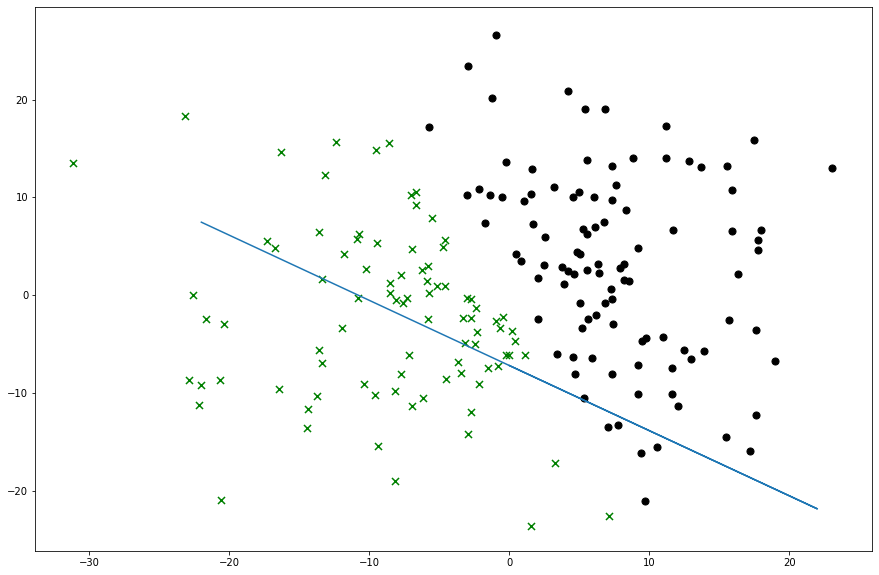

True line:[2 5 1], Estimated line: [ 85534.64155596  57055.06692551 615852.2       ]
shifting point: epoch: 0, point : [-4.72619426  9.45612906  1.        ], err: 0.0, num_errors_in_batch: 8


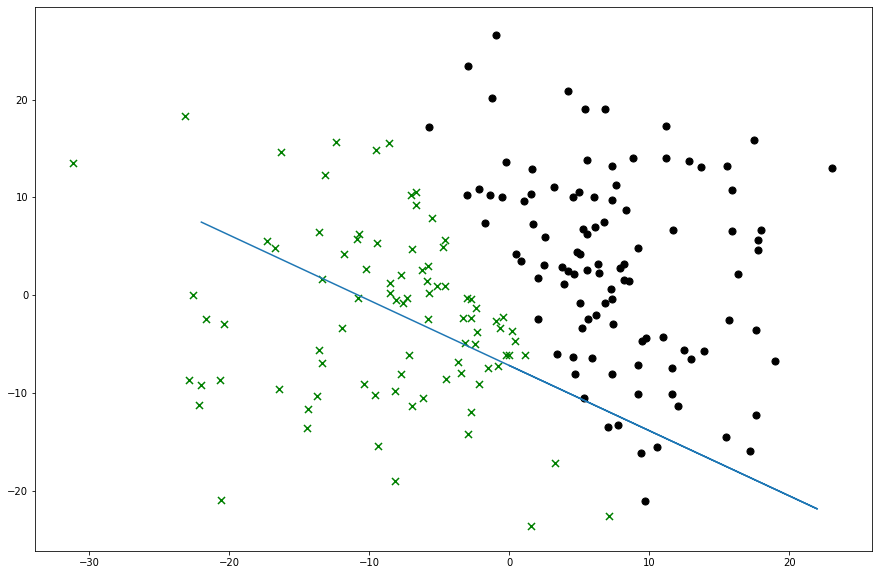

True line:[2 5 1], Estimated line: [ 85519.58883171  57084.32685563 615849.2       ]
shifting point: epoch: 0, point : [9.59130713 1.05362112 1.        ], err: 0.0, num_errors_in_batch: 13


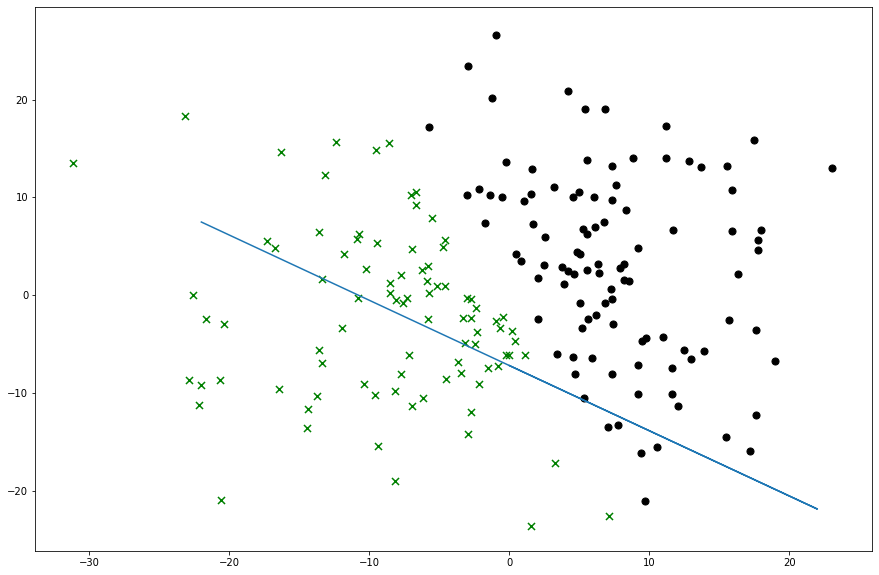

True line:[2 5 1], Estimated line: [ 85489.09178793  57121.25721363 615848.2       ]
shifting point: epoch: 0, point : [6.30786881 5.53207821 1.        ], err: 0.0, num_errors_in_batch: 16


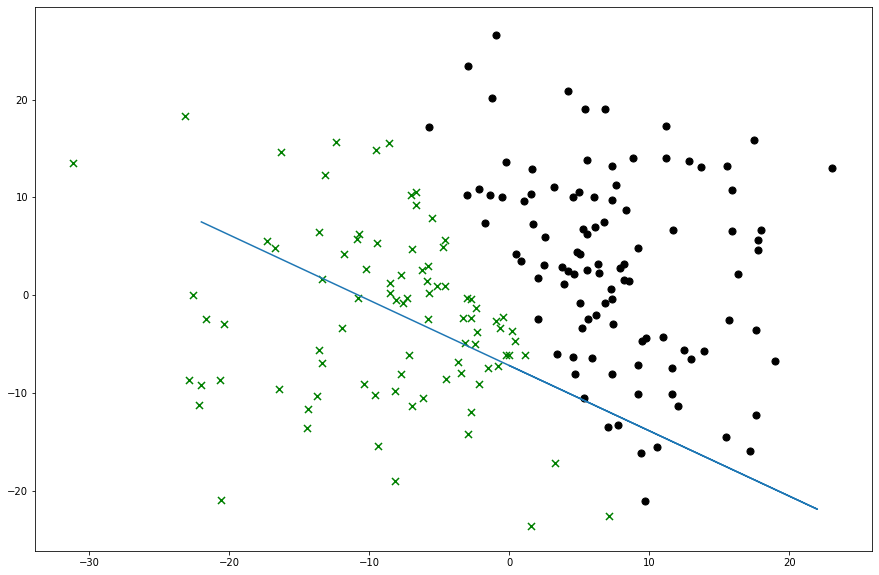

True line:[2 5 1], Estimated line: [ 85445.5279607   57161.57163009 615844.2       ]
shifting point: epoch: 0, point : [-2.97065532  7.4015622   1.        ], err: 0.0, num_errors_in_batch: 22


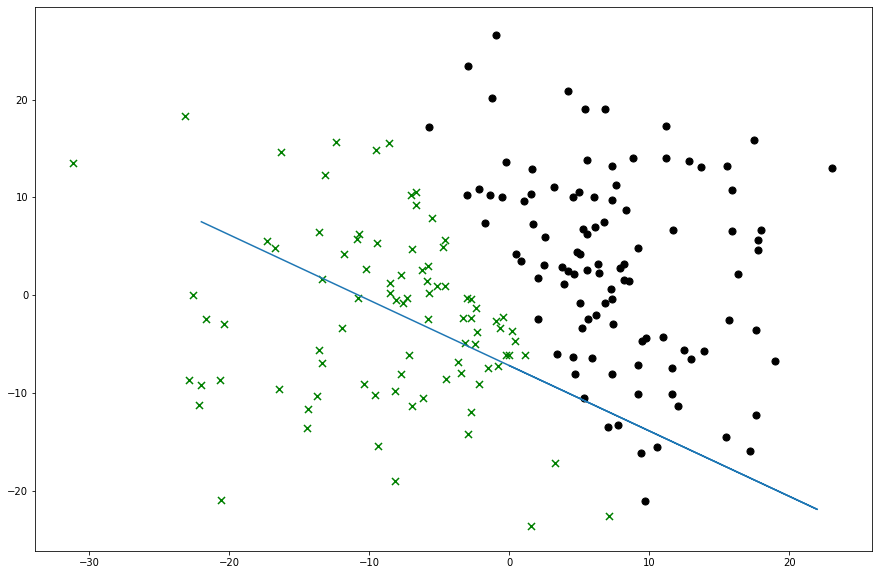

True line:[2 5 1], Estimated line: [ 85444.2104997   57192.56374296 615839.2       ]
shifting point: epoch: 0, point : [-5.75180343 13.91444985  1.        ], err: 0.0, num_errors_in_batch: 27


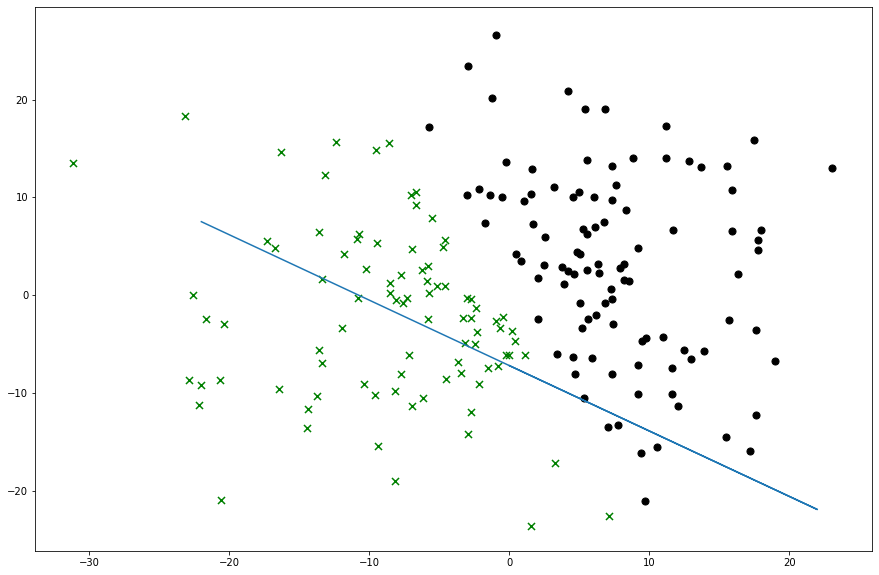

True line:[2 5 1], Estimated line: [ 85405.29674387  57249.53987861 615834.2       ]
shifting point: epoch: 0, point : [-19.05206152  -8.14103399   1.        ], err: 0.0, num_errors_in_batch: 32


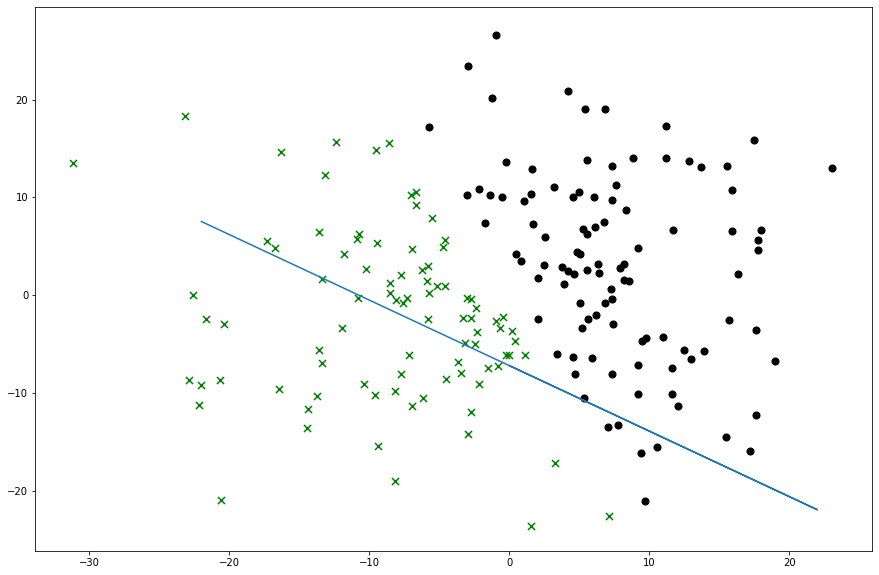

True line:[2 5 1], Estimated line: [ 85399.14469907  57283.34546848 615828.2       ]
shifting point: epoch: 0, point : [-3.37628363 -0.66077225  1.        ], err: -1.0, num_errors_in_batch: 38


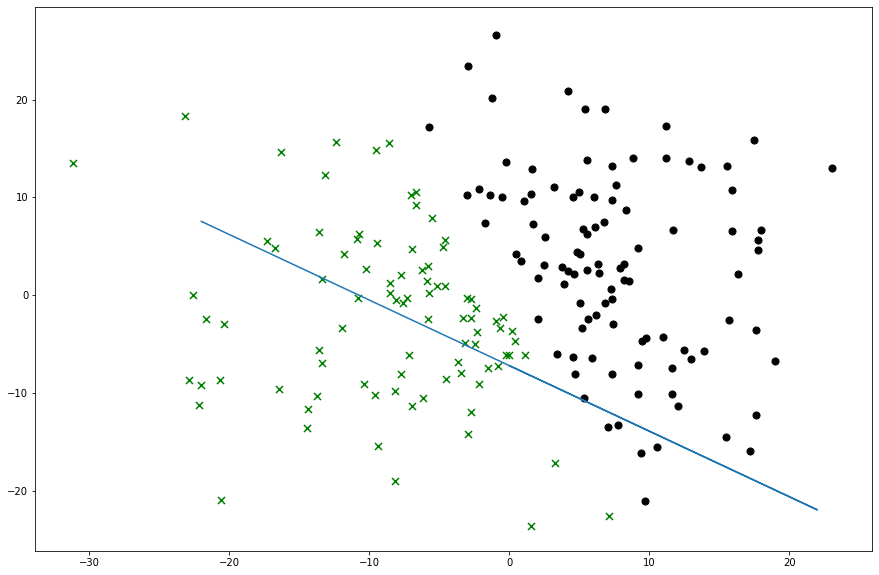

True line:[2 5 1], Estimated line: [ 85389.03316081  57324.28328648 615822.2       ]
shifting point: epoch: 0, point : [-6.11485273  1.12773075  1.        ], err: -1.0, num_errors_in_batch: 44


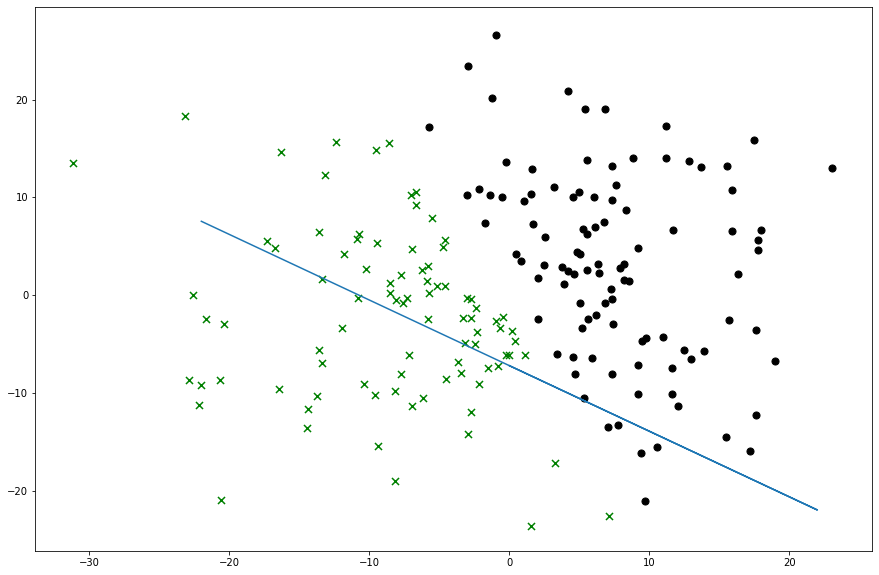

True line:[2 5 1], Estimated line: [ 85366.39960997  57358.11983582 615816.2       ]
shifting point: epoch: 0, point : [-2.53013485 15.70624932  1.        ], err: 0.0, num_errors_in_batch: 50


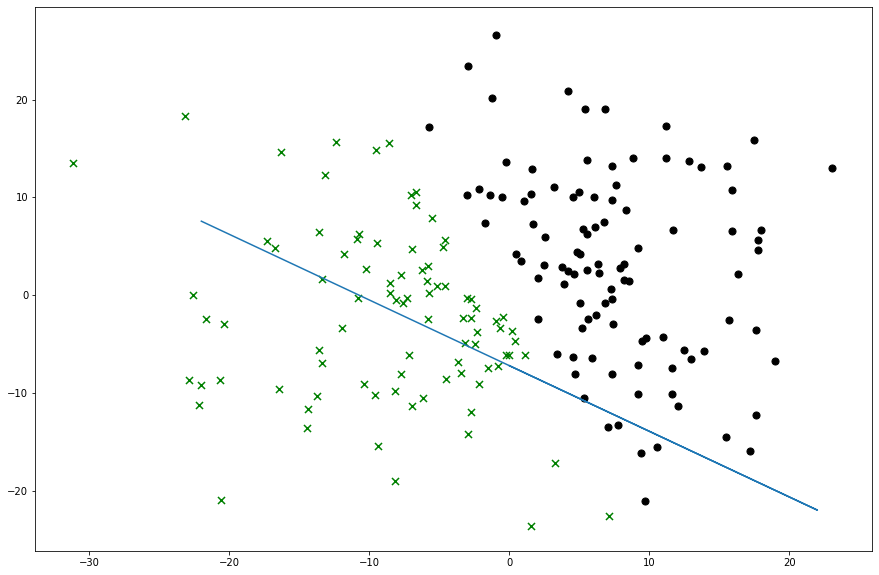

True line:[2 5 1], Estimated line: [ 170712.70295642  114348.27385459 1230699.4       ]
shifting point: epoch: 1, point : [14.04827582 11.19389821  1.        ], err: 0.0, num_errors_in_batch: 3


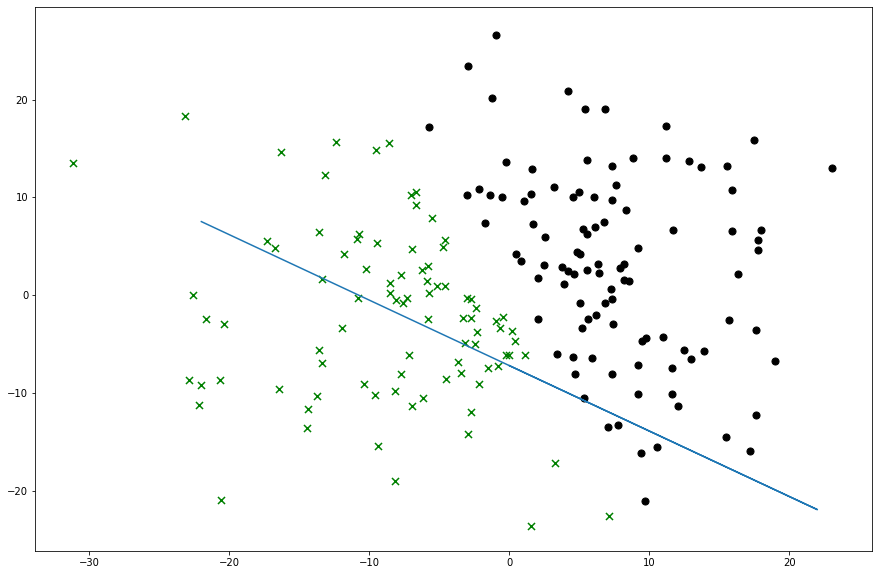

True line:[2 5 1], Estimated line: [ 170696.85147116  114389.69471753 1230693.4       ]
shifting point: epoch: 1, point : [-11.3104341   12.05738998   1.        ], err: 0.0, num_errors_in_batch: 11


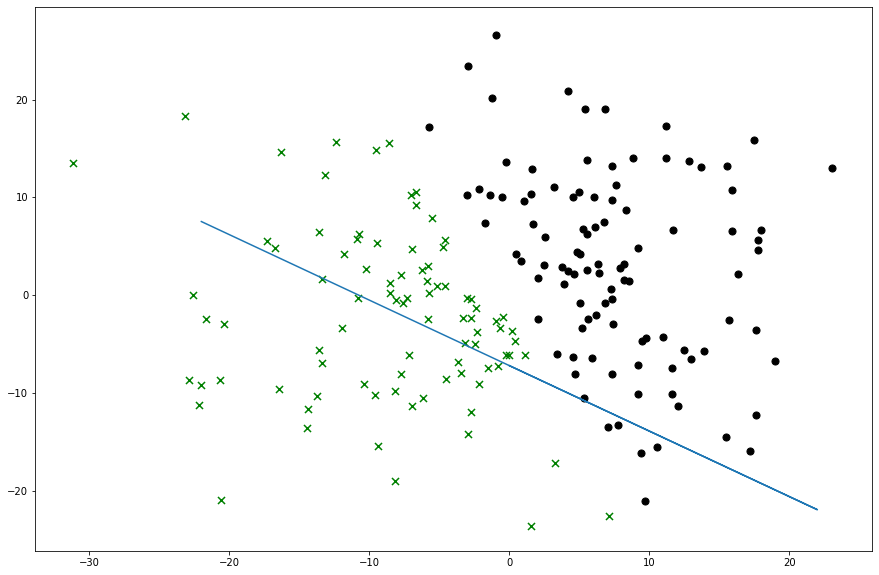

True line:[2 5 1], Estimated line: [ 170671.22991359  114435.35506544 1230690.4       ]
shifting point: epoch: 1, point : [ 2.17794467 16.30407068  1.        ], err: 0.0, num_errors_in_batch: 16


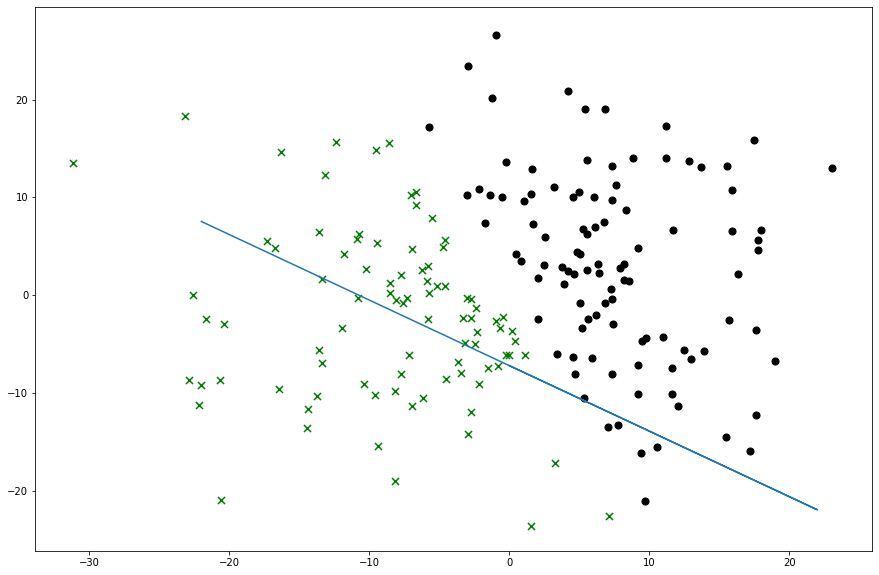

True line:[2 5 1], Estimated line: [ 170650.23930737  114460.12605169 1230686.4       ]
shifting point: epoch: 1, point : [-3.382029   5.2012413  1.       ], err: 0.0, num_errors_in_batch: 20


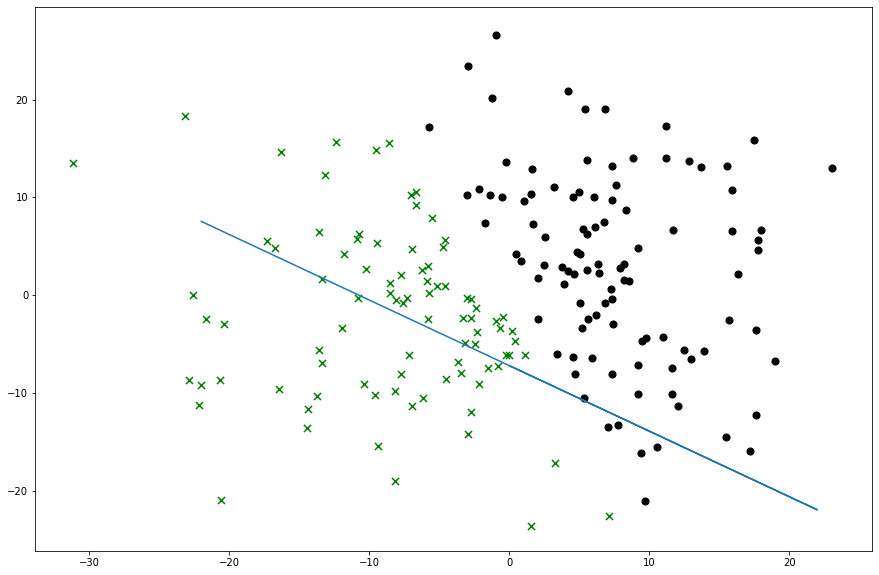

True line:[2 5 1], Estimated line: [ 170632.76438445  114493.03044574 1230682.4       ]
shifting point: epoch: 1, point : [-11.61621023 -14.35420055   1.        ], err: 0.0, num_errors_in_batch: 26


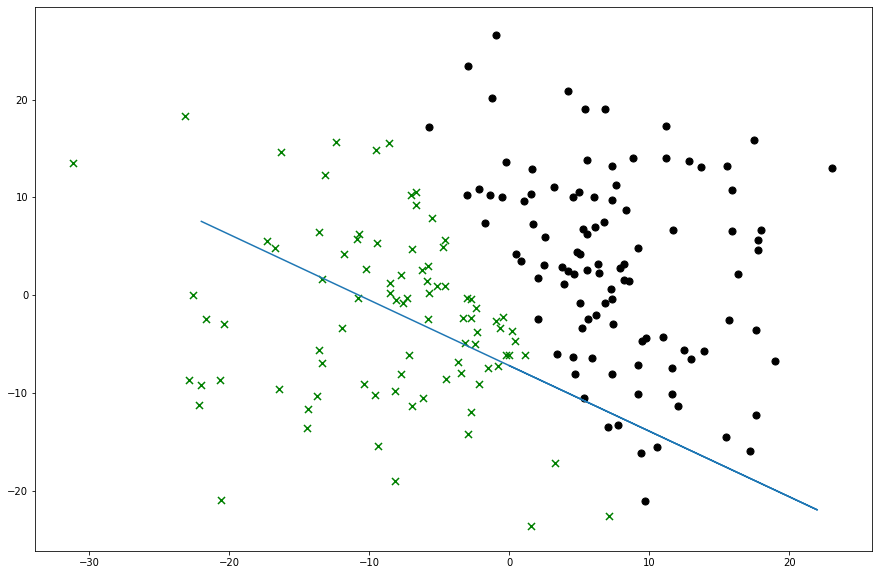

True line:[2 5 1], Estimated line: [ 170612.94369688  114525.11614936 1230679.4       ]
shifting point: epoch: 1, point : [1.10375896 3.8943703  1.        ], err: 0.0, num_errors_in_batch: 29


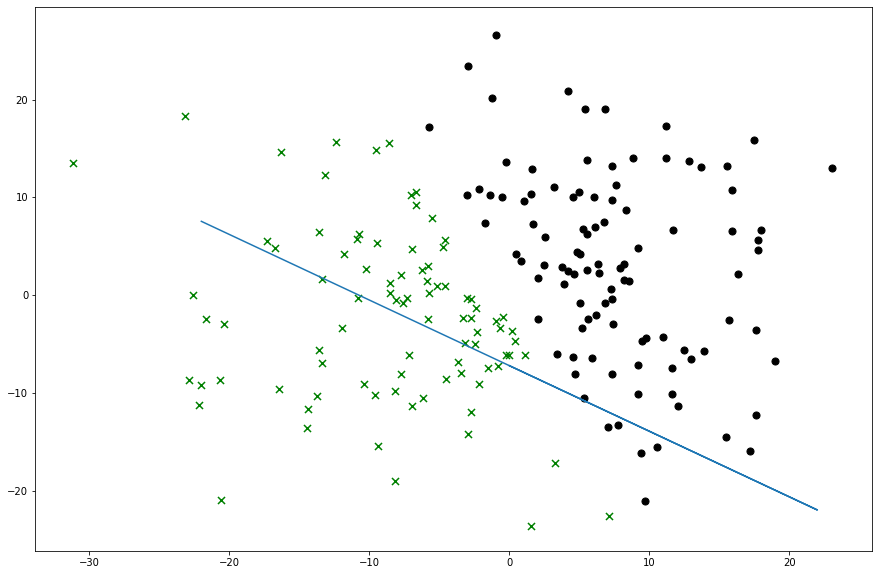

True line:[2 5 1], Estimated line: [ 170582.98821494  114580.01246743 1230673.4       ]
shifting point: epoch: 1, point : [-8.53669418 -4.50996197  1.        ], err: 0.0, num_errors_in_batch: 35


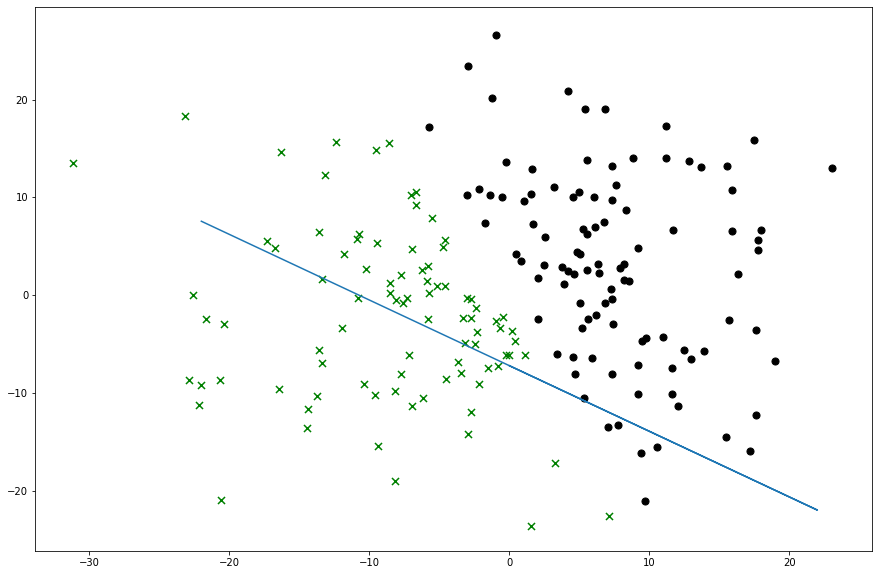

True line:[2 5 1], Estimated line: [ 170578.37190208  114620.77054461 1230667.4       ]
shifting point: epoch: 1, point : [7.43858111 6.77806855 1.        ], err: 0.0, num_errors_in_batch: 41


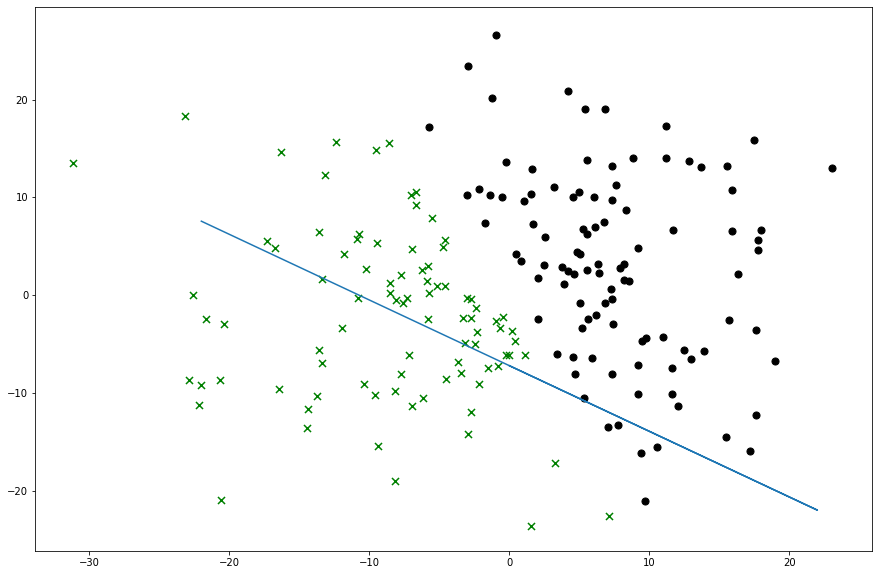

True line:[2 5 1], Estimated line: [ 170542.33818465  114665.08531747 1230661.4       ]
shifting point: epoch: 1, point : [ 15.64386671 -12.35141373   1.        ], err: -1.0, num_errors_in_batch: 47


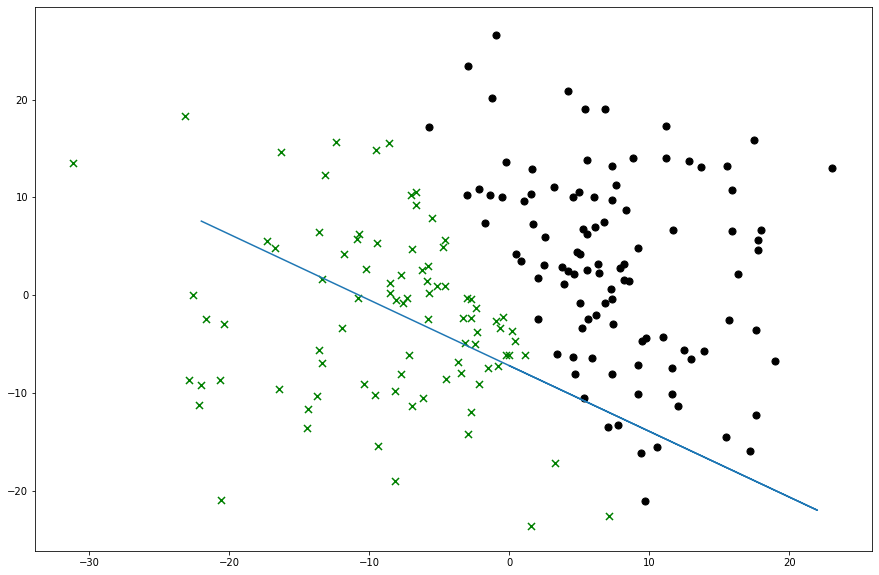

True line:[2 5 1], Estimated line: [ 255900.27625132  171652.19570362 1845543.6       ]
shifting point: epoch: 2, point : [135.  90. 972.], err: 632.6, num_errors_in_batch: 1


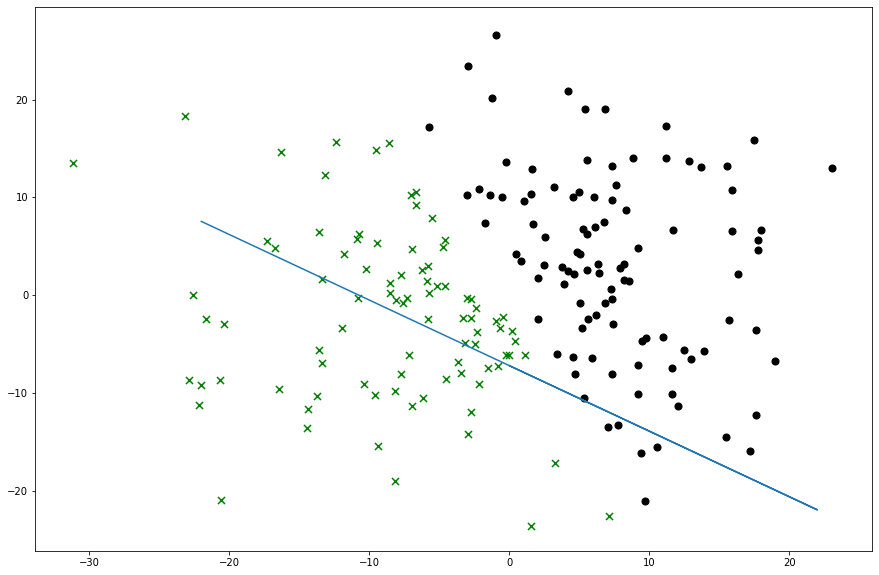

True line:[2 5 1], Estimated line: [ 255898.91780728  171683.26262913 1845536.6       ]
shifting point: epoch: 2, point : [-4.72619426  9.45612906  1.        ], err: 0.0, num_errors_in_batch: 8


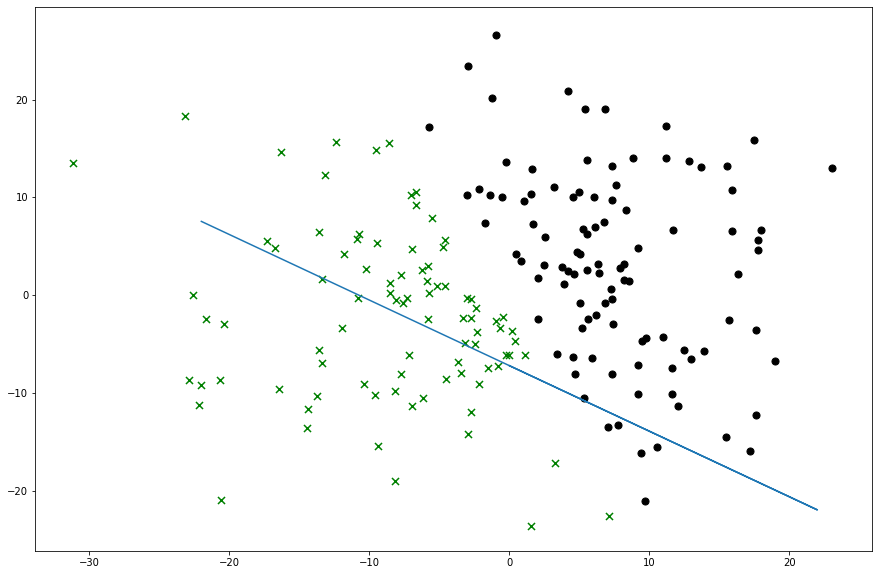

True line:[2 5 1], Estimated line: [ 255883.86508303  171712.52255925 1845533.6       ]
shifting point: epoch: 2, point : [9.59130713 1.05362112 1.        ], err: 0.0, num_errors_in_batch: 13


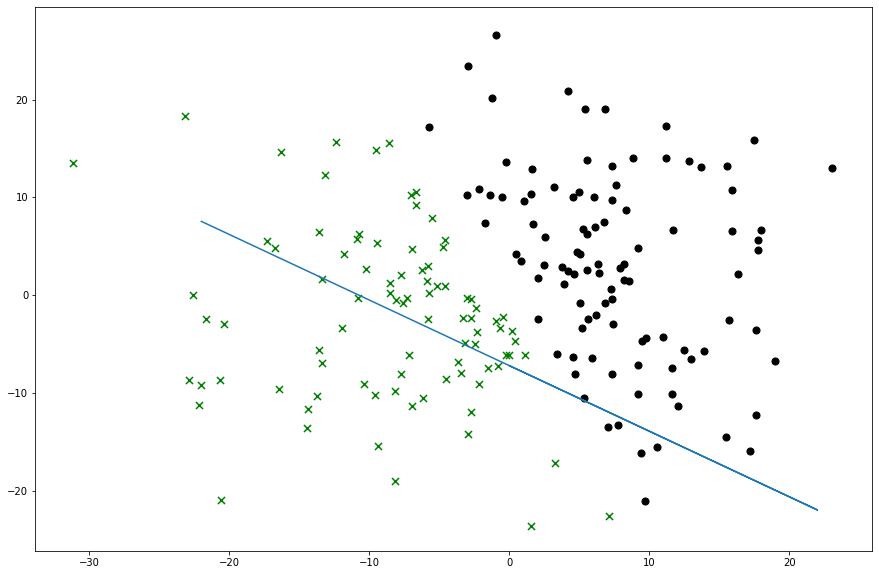

True line:[2 5 1], Estimated line: [ 255853.36803925  171749.45291725 1845532.6       ]
shifting point: epoch: 2, point : [6.30786881 5.53207821 1.        ], err: 0.0, num_errors_in_batch: 16


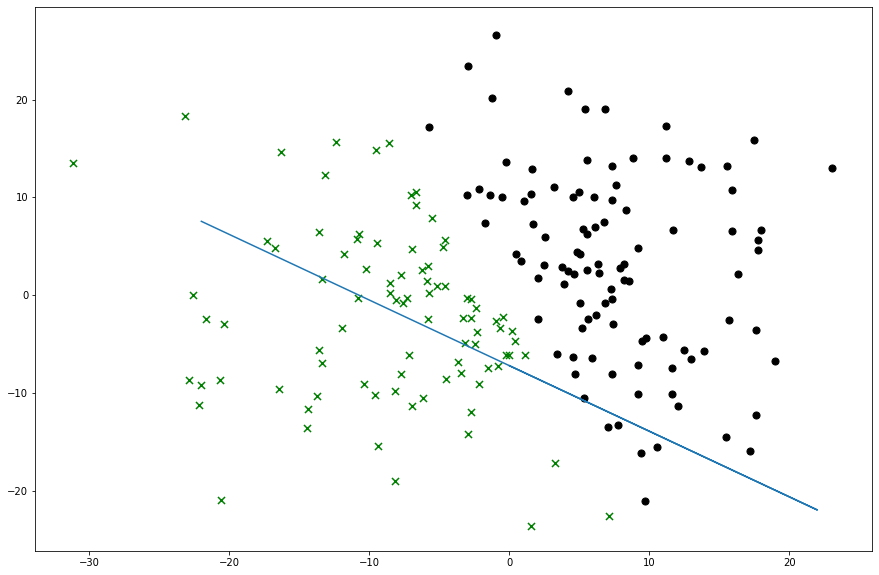

True line:[2 5 1], Estimated line: [ 255809.80421201  171789.76733371 1845528.6       ]
shifting point: epoch: 2, point : [-2.97065532  7.4015622   1.        ], err: 0.0, num_errors_in_batch: 22


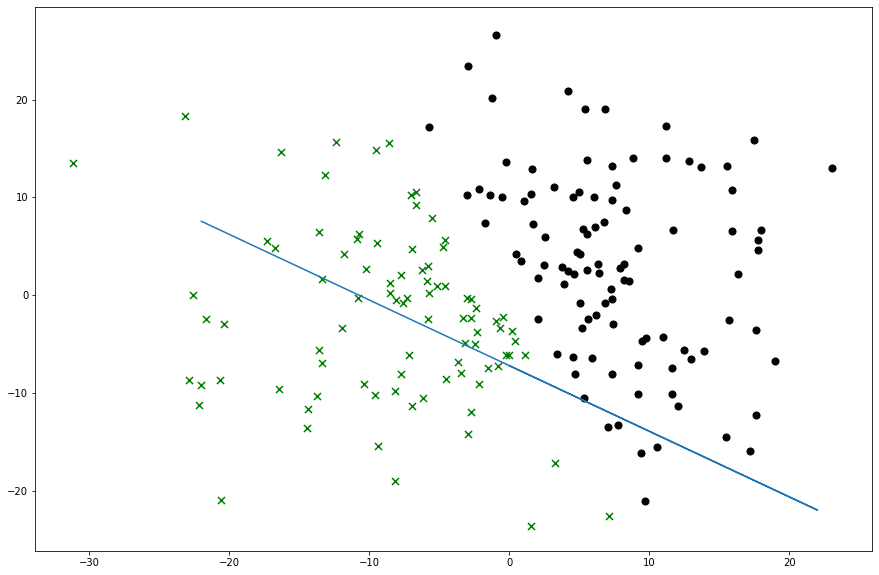

True line:[2 5 1], Estimated line: [ 255808.48675102  171820.75944658 1845523.6       ]
shifting point: epoch: 2, point : [-5.75180343 13.91444985  1.        ], err: 0.0, num_errors_in_batch: 27


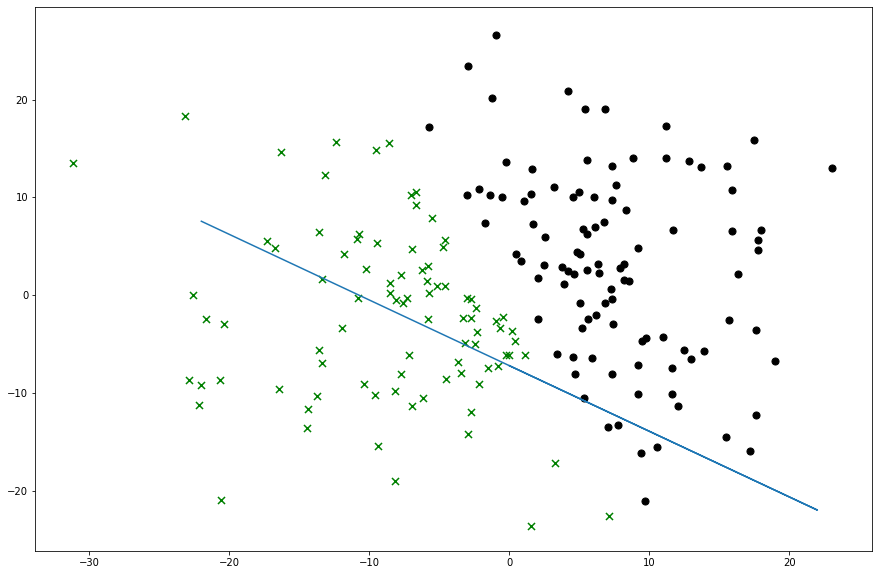

True line:[2 5 1], Estimated line: [ 255769.57299519  171877.73558224 1845518.6       ]
shifting point: epoch: 2, point : [-19.05206152  -8.14103399   1.        ], err: 0.0, num_errors_in_batch: 32


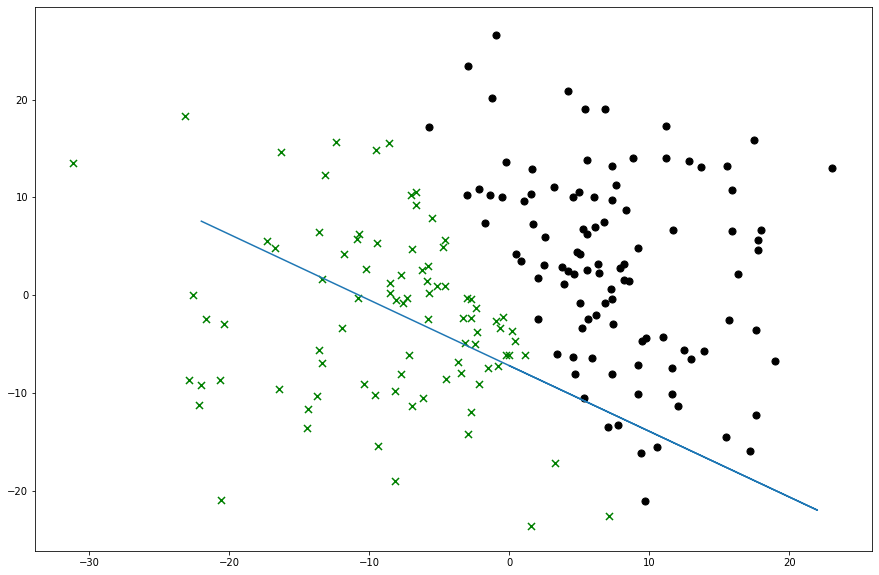

True line:[2 5 1], Estimated line: [ 255763.42095039  171911.5411721  1845512.6       ]
shifting point: epoch: 2, point : [-3.37628363 -0.66077225  1.        ], err: -1.0, num_errors_in_batch: 38


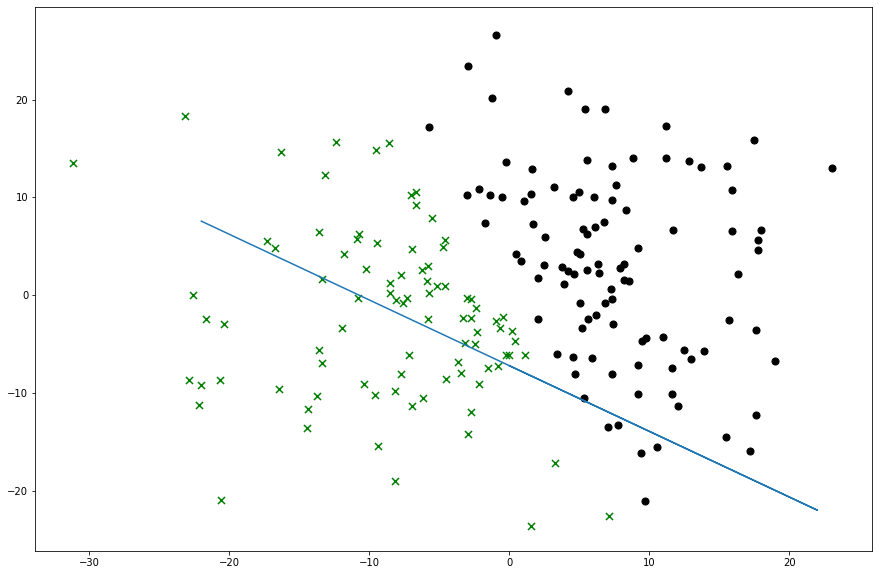

True line:[2 5 1], Estimated line: [ 255753.30941213  171952.47899011 1845506.6       ]
shifting point: epoch: 2, point : [-6.11485273  1.12773075  1.        ], err: -1.0, num_errors_in_batch: 44


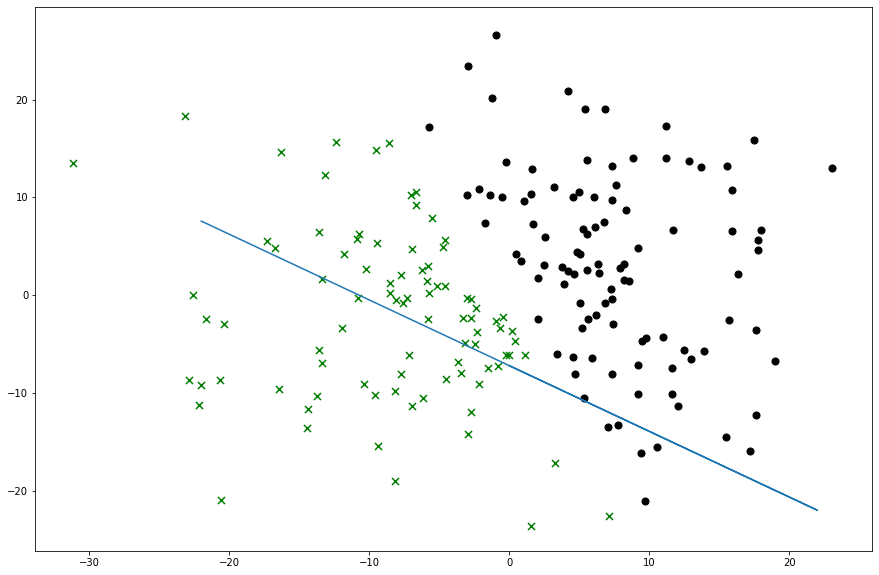

True line:[2 5 1], Estimated line: [ 255730.67586129  171986.31553944 1845500.6       ]
shifting point: epoch: 2, point : [-2.53013485 15.70624932  1.        ], err: 0.0, num_errors_in_batch: 50


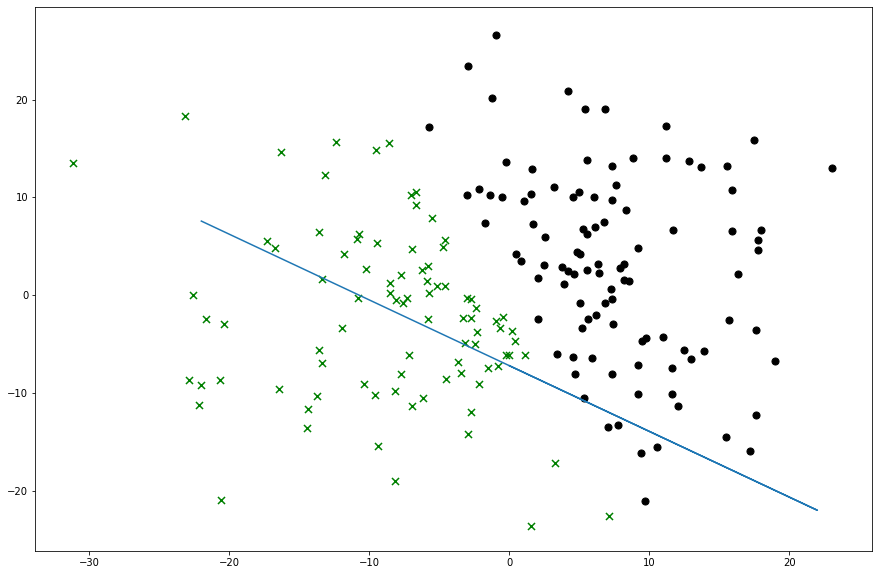

True line:[2 5 1], Estimated line: [ 341076.97920774  228976.46955821 2460383.8       ]
shifting point: epoch: 3, point : [14.04827582 11.19389821  1.        ], err: 0.0, num_errors_in_batch: 3


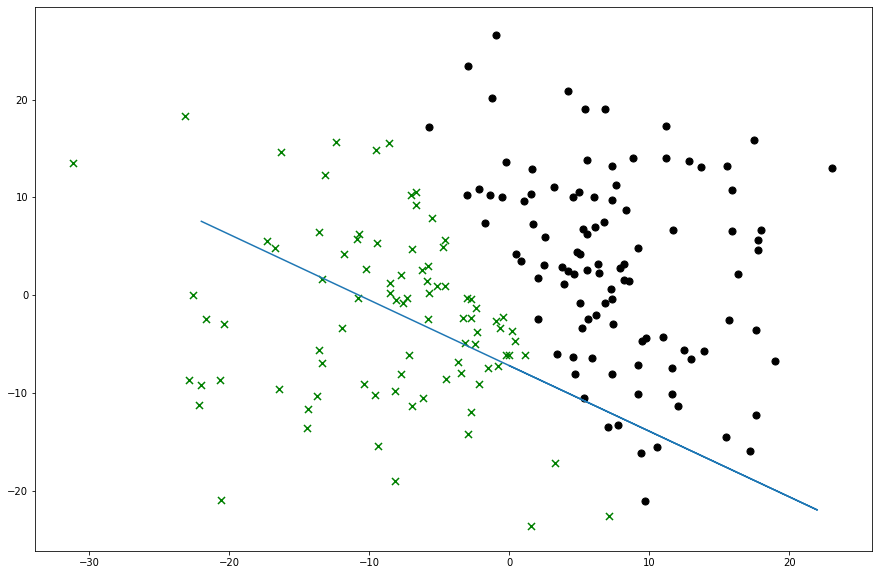

True line:[2 5 1], Estimated line: [ 341061.12772248  229017.89042115 2460377.8       ]
shifting point: epoch: 3, point : [-11.3104341   12.05738998   1.        ], err: 0.0, num_errors_in_batch: 11


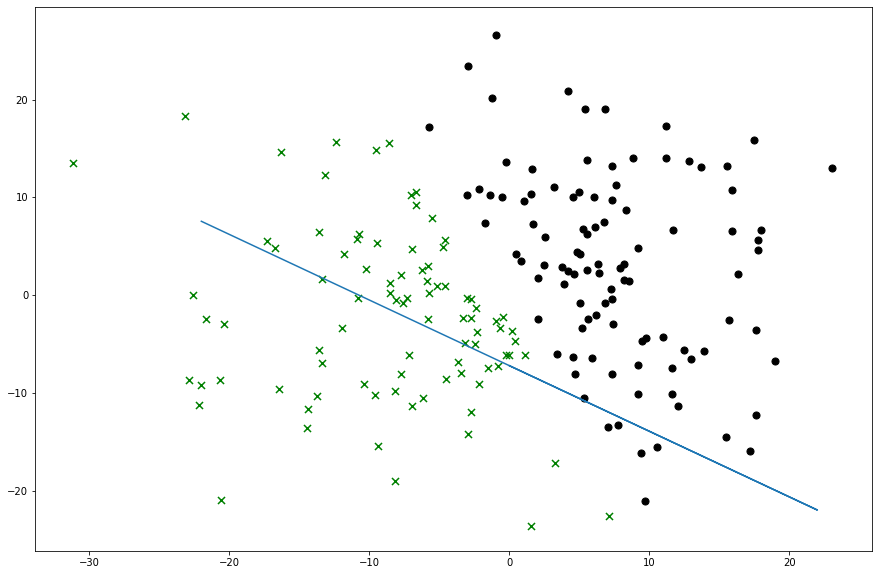

True line:[2 5 1], Estimated line: [ 341035.50616491  229063.55076907 2460374.8       ]
shifting point: epoch: 3, point : [ 2.17794467 16.30407068  1.        ], err: 0.0, num_errors_in_batch: 16


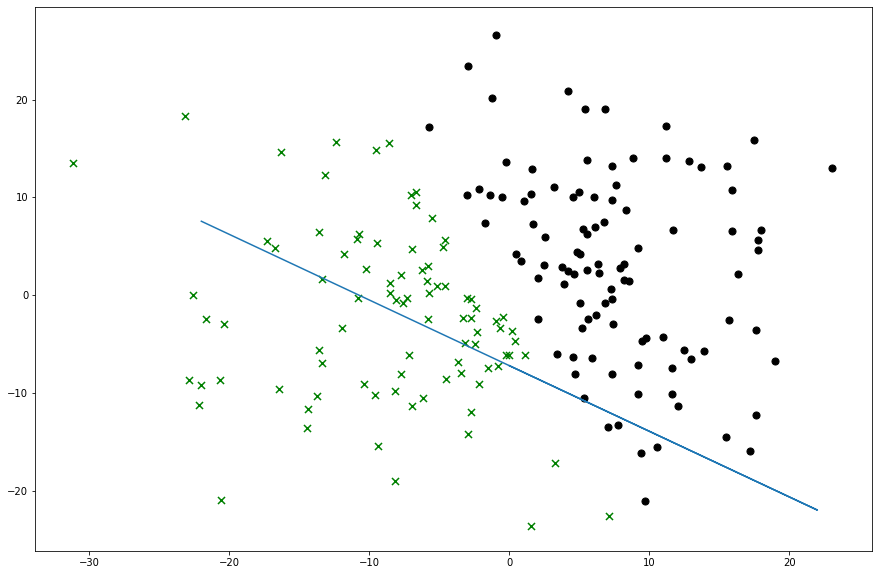

True line:[2 5 1], Estimated line: [ 341014.51555869  229088.32175532 2460370.8       ]
shifting point: epoch: 3, point : [-3.382029   5.2012413  1.       ], err: 0.0, num_errors_in_batch: 20


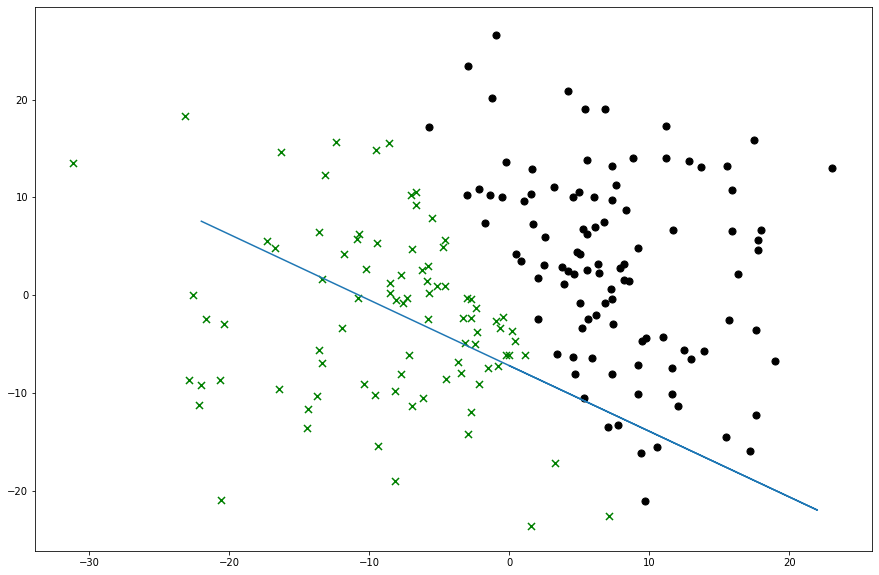

True line:[2 5 1], Estimated line: [ 340997.04063577  229121.22614936 2460366.8       ]
shifting point: epoch: 3, point : [-11.61621023 -14.35420055   1.        ], err: 0.0, num_errors_in_batch: 26


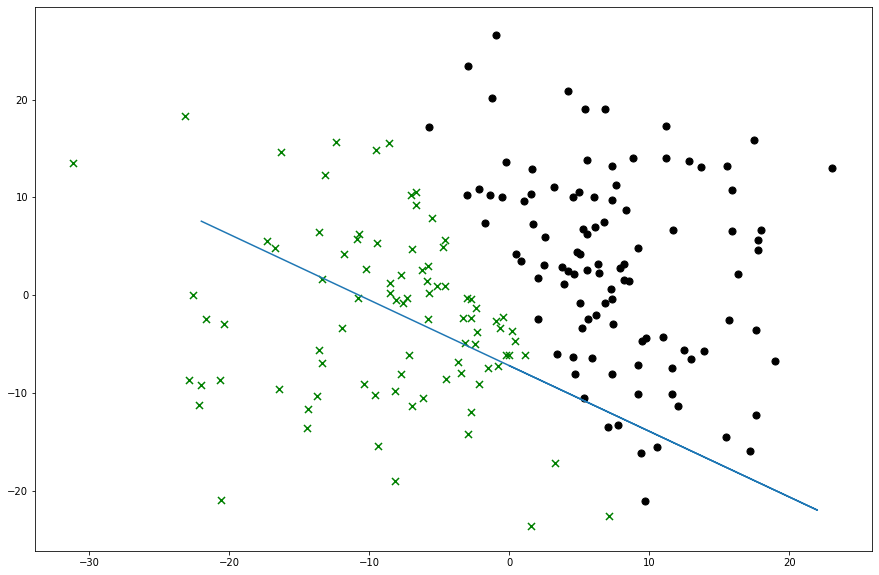

True line:[2 5 1], Estimated line: [ 340977.2199482   229153.31185298 2460363.8       ]
shifting point: epoch: 3, point : [1.10375896 3.8943703  1.        ], err: 0.0, num_errors_in_batch: 29


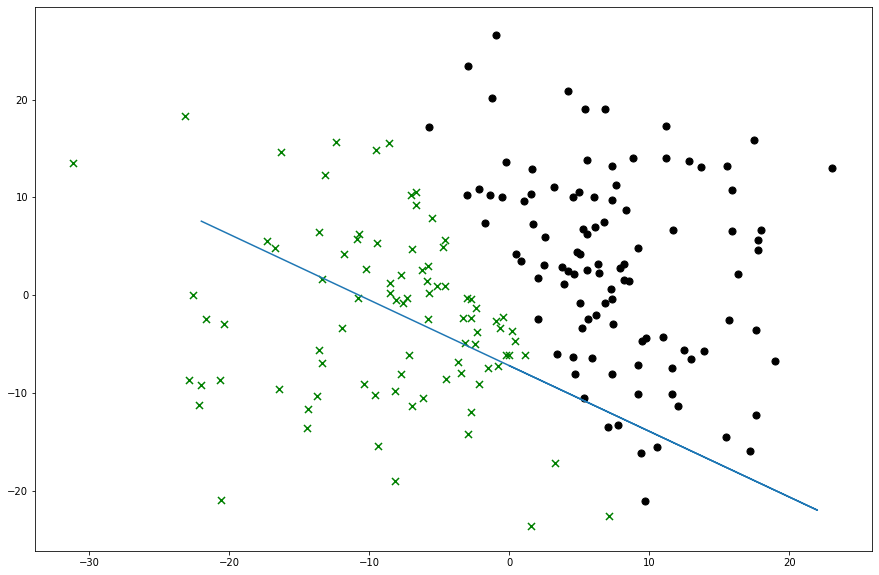

True line:[2 5 1], Estimated line: [ 340947.26446626  229208.20817105 2460357.8       ]
shifting point: epoch: 3, point : [-8.53669418 -4.50996197  1.        ], err: 0.0, num_errors_in_batch: 35


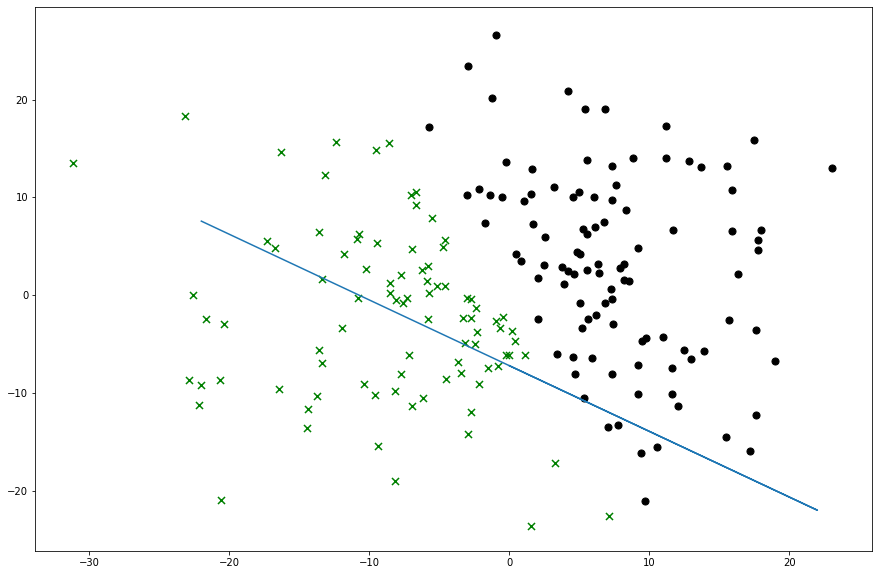

True line:[2 5 1], Estimated line: [ 340942.64815339  229248.96624823 2460351.8       ]
shifting point: epoch: 3, point : [7.43858111 6.77806855 1.        ], err: 0.0, num_errors_in_batch: 41


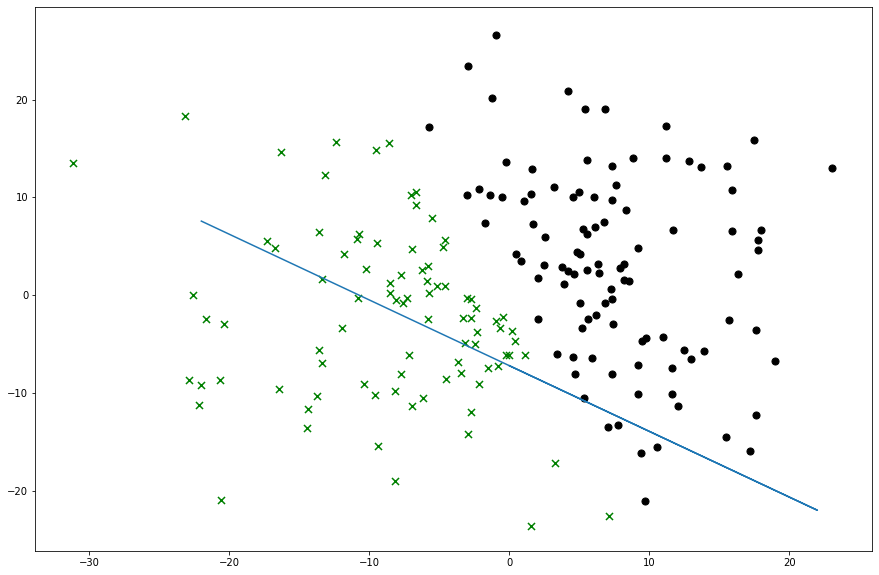

True line:[2 5 1], Estimated line: [ 340906.61443597  229293.28102109 2460345.8       ]
shifting point: epoch: 3, point : [ 15.64386671 -12.35141373   1.        ], err: -1.0, num_errors_in_batch: 47


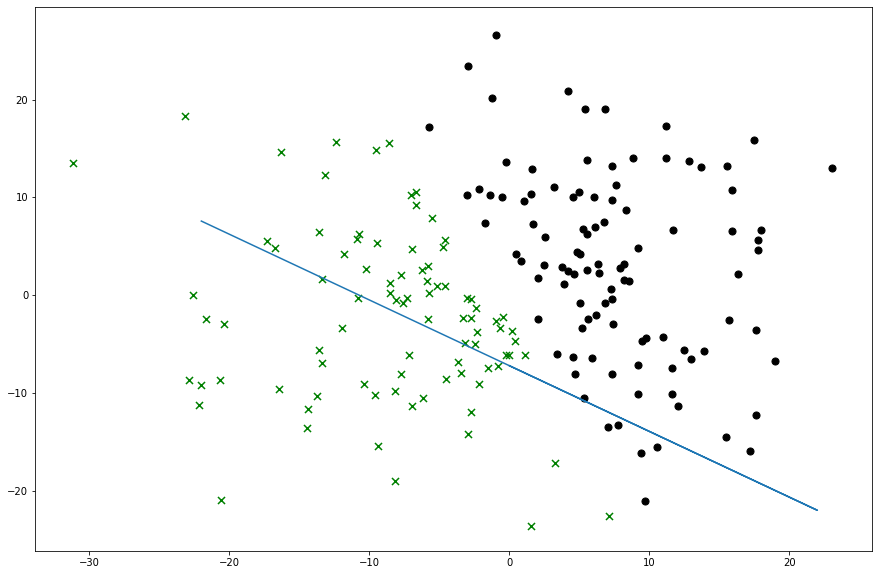

True line:[2 5 1], Estimated line: [ 426264.55250264  286280.39140724 3075228.        ]
shifting point: epoch: 4, point : [135.  90. 972.], err: 632.6, num_errors_in_batch: 1


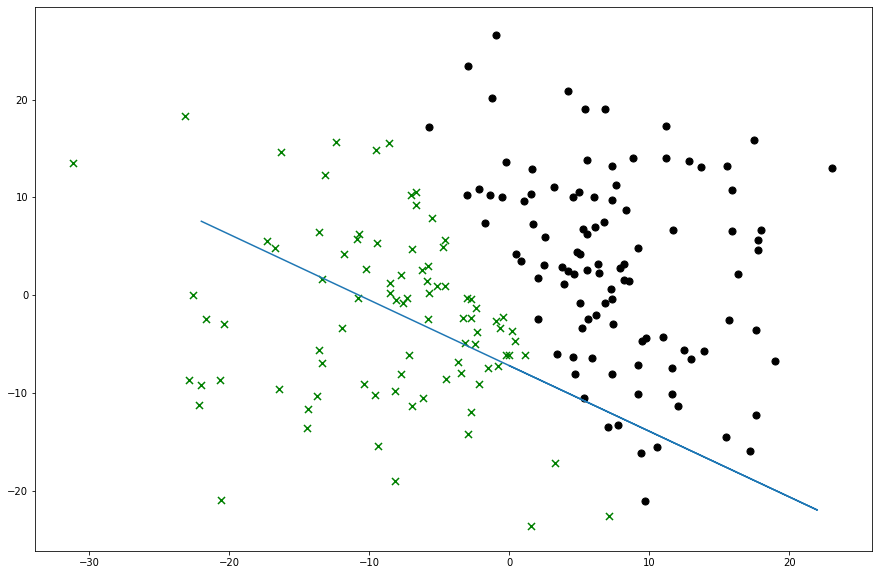

True line:[2 5 1], Estimated line: [ 426263.1940586   286311.45833275 3075221.        ]
shifting point: epoch: 4, point : [-4.72619426  9.45612906  1.        ], err: 0.0, num_errors_in_batch: 8


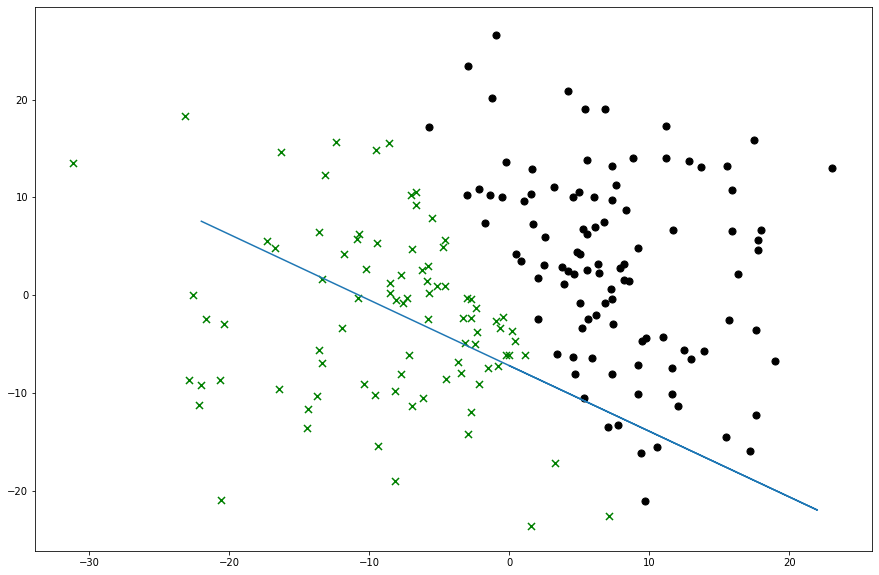

True line:[2 5 1], Estimated line: [ 426248.14133435  286340.71826288 3075218.        ]
shifting point: epoch: 4, point : [9.59130713 1.05362112 1.        ], err: 0.0, num_errors_in_batch: 13


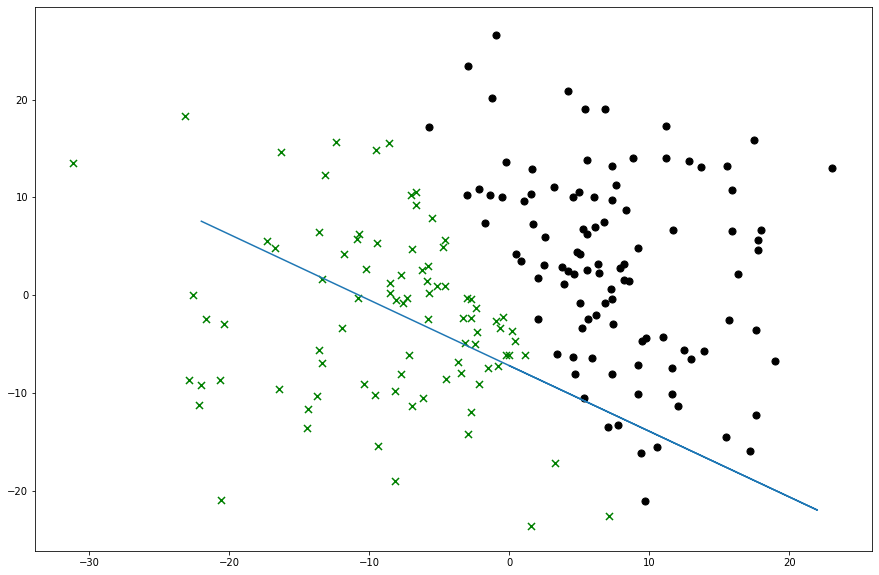

True line:[2 5 1], Estimated line: [ 426217.64429057  286377.64862088 3075217.        ]
shifting point: epoch: 4, point : [6.30786881 5.53207821 1.        ], err: 0.0, num_errors_in_batch: 16


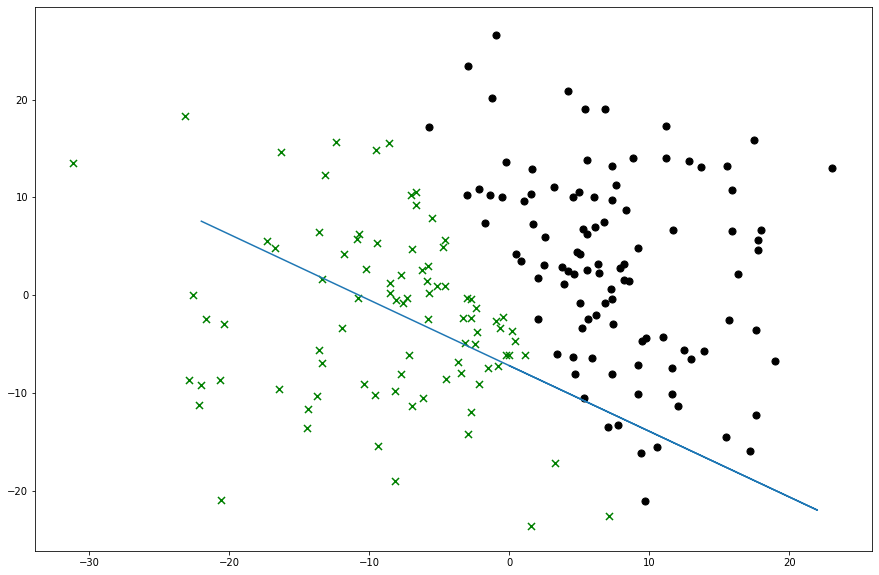

True line:[2 5 1], Estimated line: [ 426174.08046333  286417.96303734 3075213.        ]
shifting point: epoch: 4, point : [-2.97065532  7.4015622   1.        ], err: 0.0, num_errors_in_batch: 22


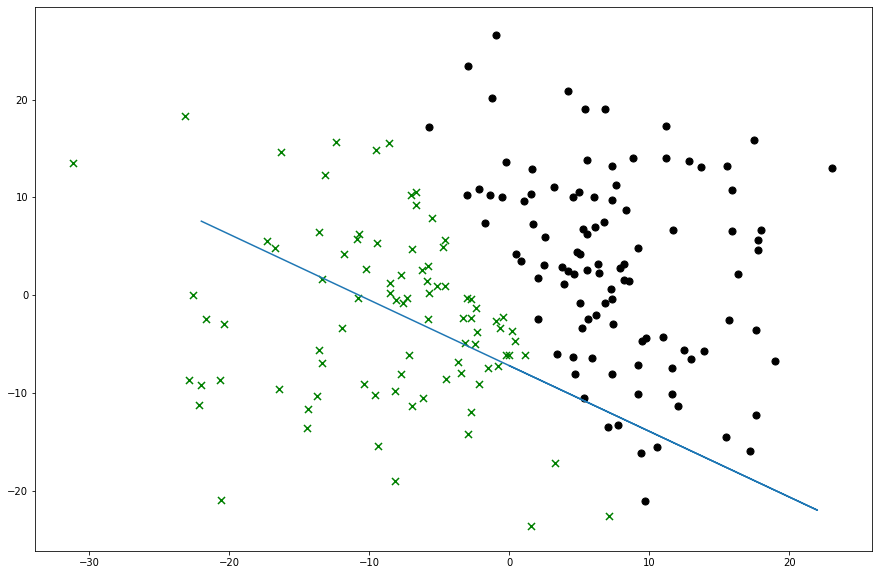

True line:[2 5 1], Estimated line: [ 426172.76300234  286448.95515021 3075208.        ]
shifting point: epoch: 4, point : [-5.75180343 13.91444985  1.        ], err: 0.0, num_errors_in_batch: 27


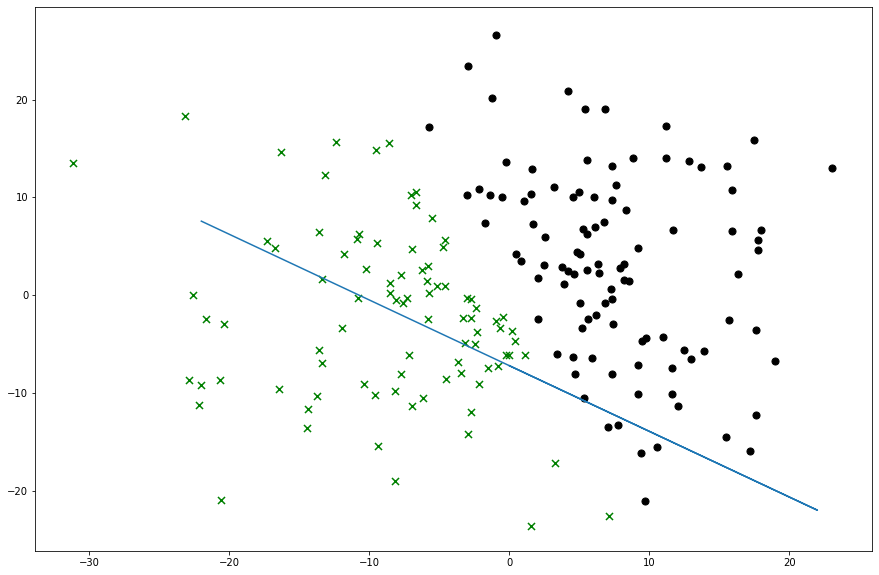

True line:[2 5 1], Estimated line: [ 426133.84924651  286505.93128586 3075203.        ]
shifting point: epoch: 4, point : [-19.05206152  -8.14103399   1.        ], err: 0.0, num_errors_in_batch: 32


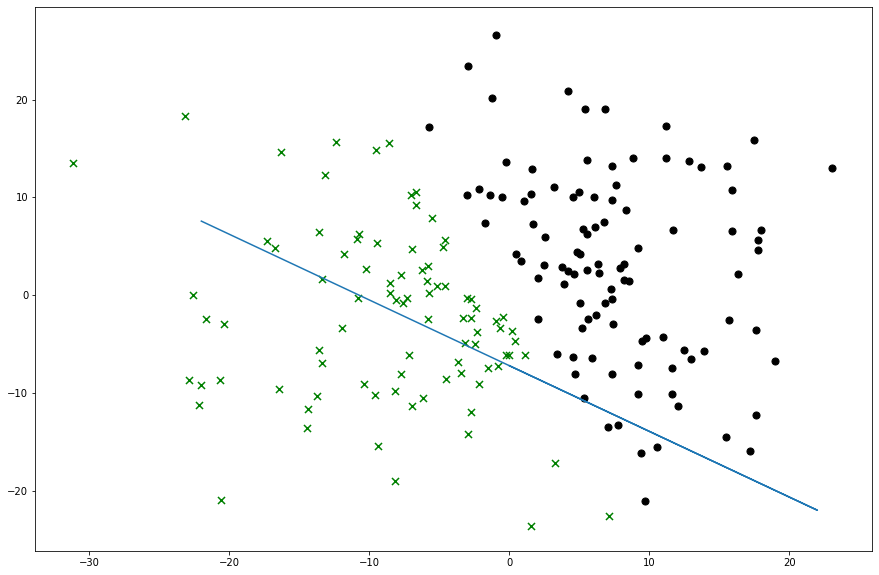

True line:[2 5 1], Estimated line: [ 426127.69720171  286539.73687573 3075197.        ]
shifting point: epoch: 4, point : [-3.37628363 -0.66077225  1.        ], err: -1.0, num_errors_in_batch: 38


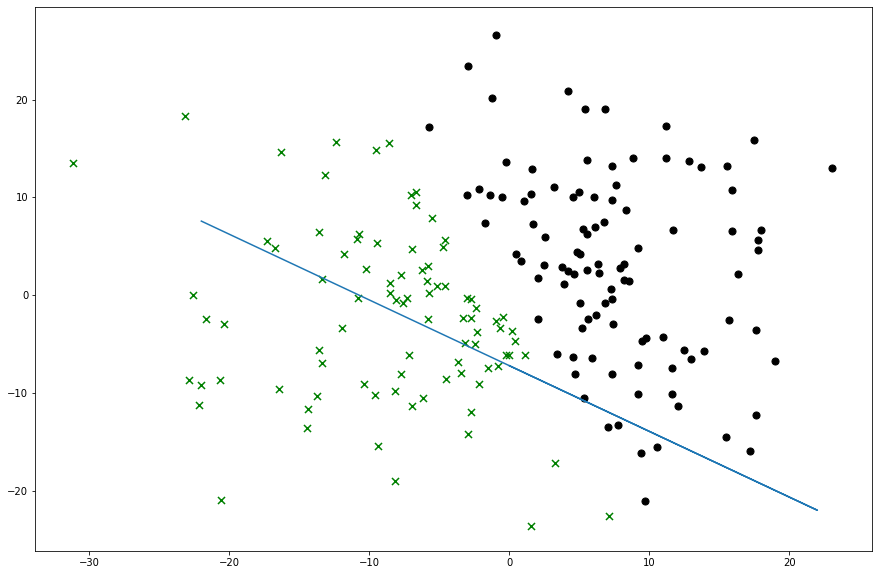

True line:[2 5 1], Estimated line: [ 426117.58566345  286580.67469373 3075191.        ]
shifting point: epoch: 4, point : [-6.11485273  1.12773075  1.        ], err: -1.0, num_errors_in_batch: 44


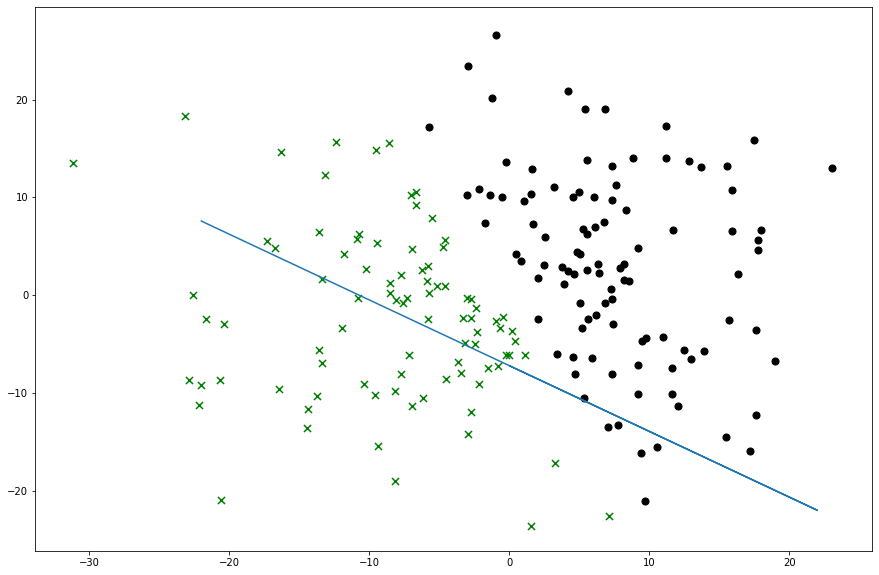

True line:[2 5 1], Estimated line: [ 426094.95211261  286614.51124306 3075185.        ]
shifting point: epoch: 4, point : [-2.53013485 15.70624932  1.        ], err: 0.0, num_errors_in_batch: 50


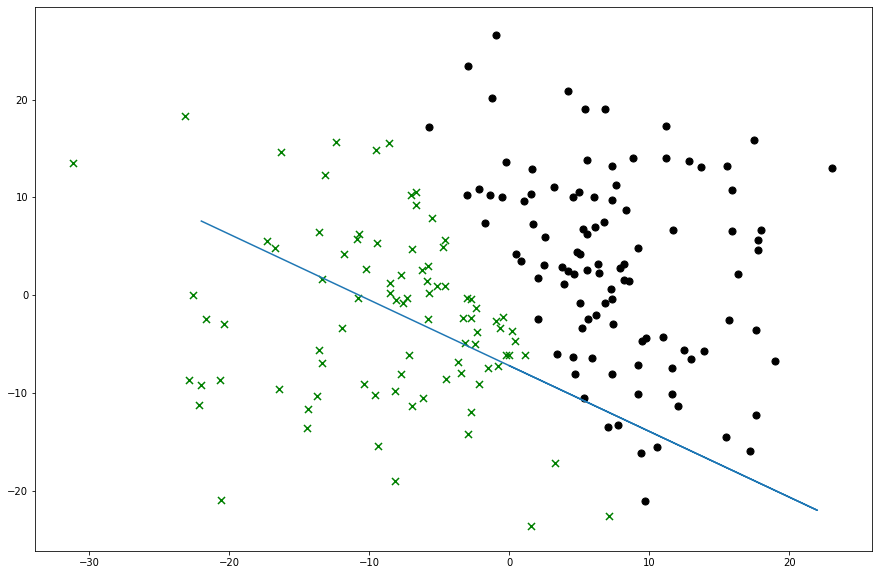

True line:[2 5 1], Estimated line: [ 511441.25545906  343604.66526183 3690068.2       ]
shifting point: epoch: 5, point : [14.04827582 11.19389821  1.        ], err: 0.0, num_errors_in_batch: 3


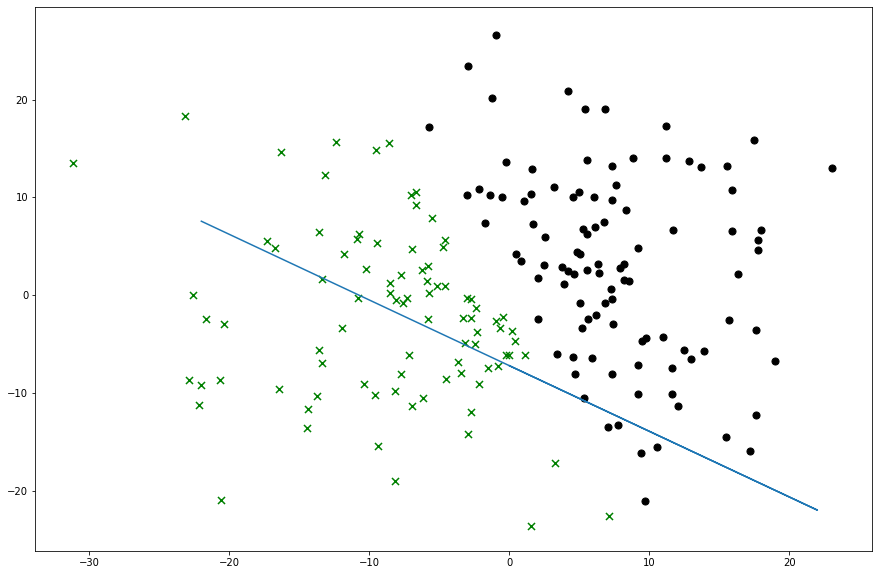

True line:[2 5 1], Estimated line: [ 511425.4039738   343646.08612477 3690062.2       ]
shifting point: epoch: 5, point : [-11.3104341   12.05738998   1.        ], err: 0.0, num_errors_in_batch: 11


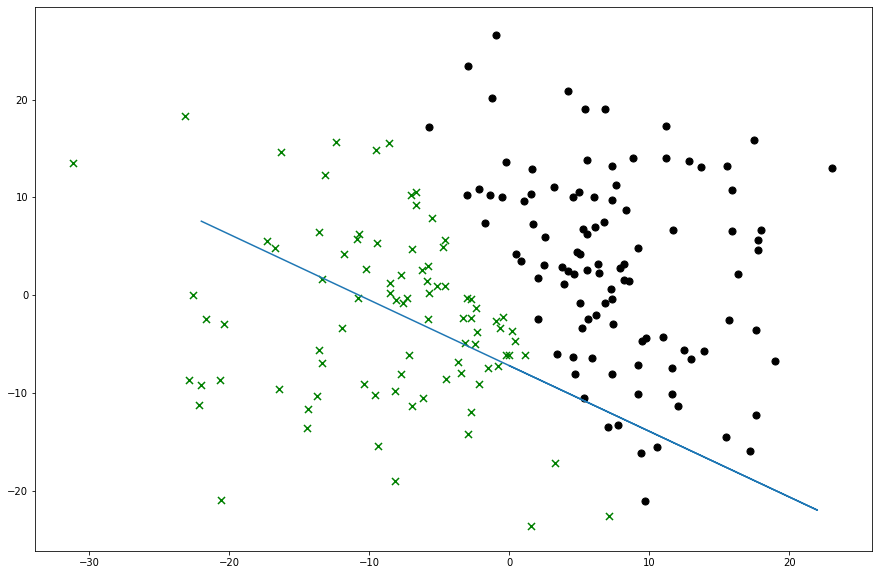

True line:[2 5 1], Estimated line: [ 511399.78241623  343691.74647269 3690059.2       ]
shifting point: epoch: 5, point : [ 2.17794467 16.30407068  1.        ], err: 0.0, num_errors_in_batch: 16


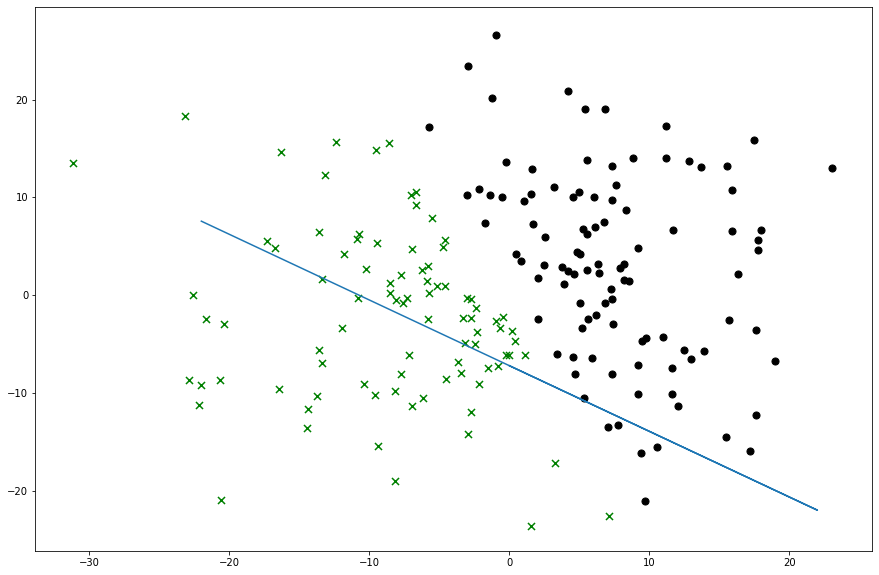

True line:[2 5 1], Estimated line: [ 511378.79181001  343716.51745894 3690055.2       ]
shifting point: epoch: 5, point : [-3.382029   5.2012413  1.       ], err: 0.0, num_errors_in_batch: 20


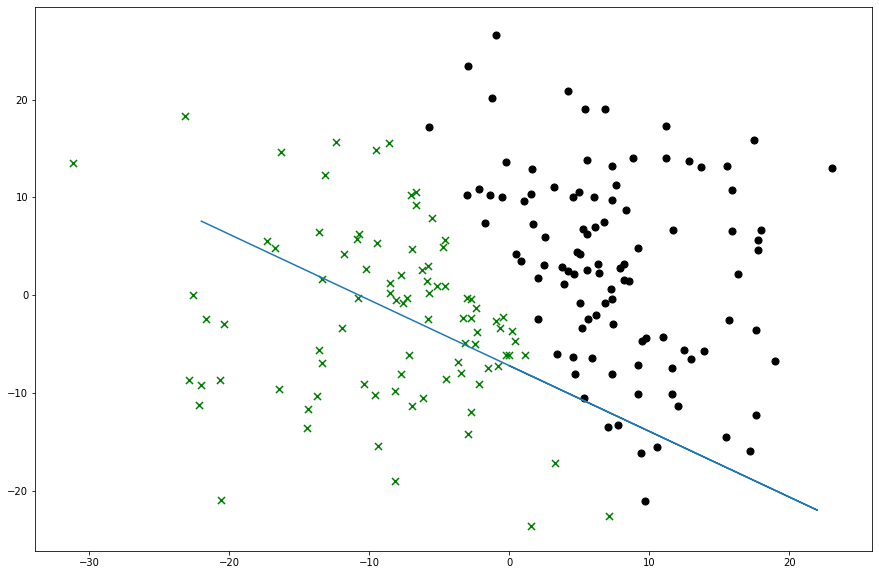

True line:[2 5 1], Estimated line: [ 511361.31688709  343749.42185298 3690051.2       ]
shifting point: epoch: 5, point : [-11.61621023 -14.35420055   1.        ], err: 0.0, num_errors_in_batch: 26


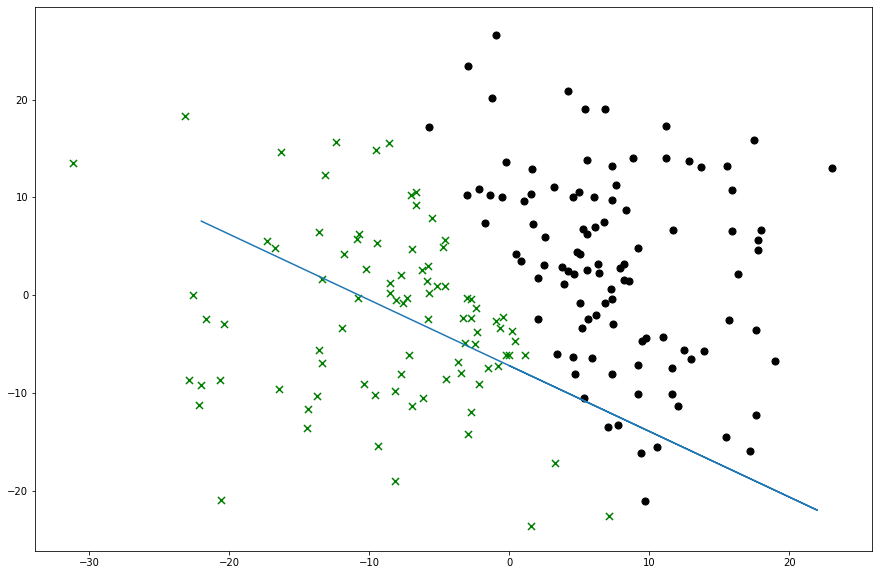

True line:[2 5 1], Estimated line: [ 511341.49619952  343781.5075566  3690048.2       ]
shifting point: epoch: 5, point : [1.10375896 3.8943703  1.        ], err: 0.0, num_errors_in_batch: 29


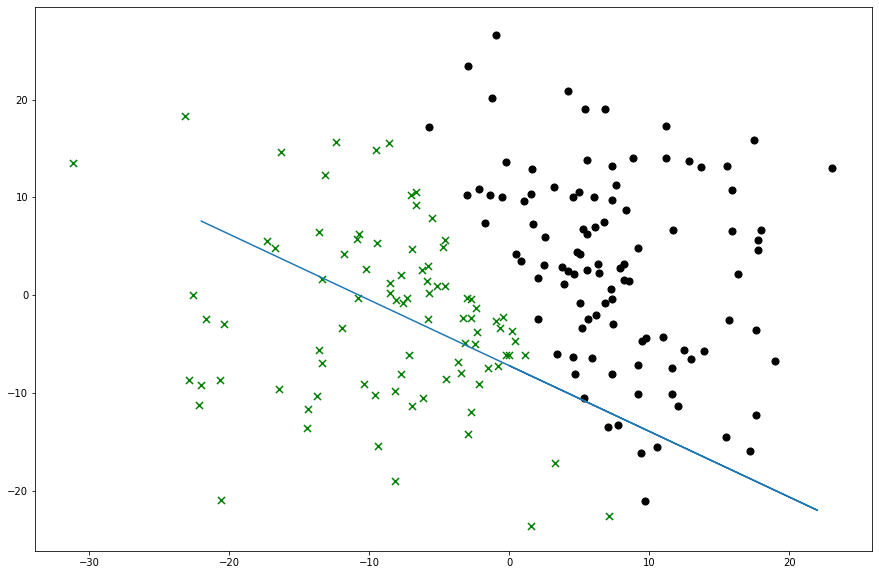

True line:[2 5 1], Estimated line: [ 511311.54071758  343836.40387468 3690042.2       ]
shifting point: epoch: 5, point : [-8.53669418 -4.50996197  1.        ], err: 0.0, num_errors_in_batch: 35


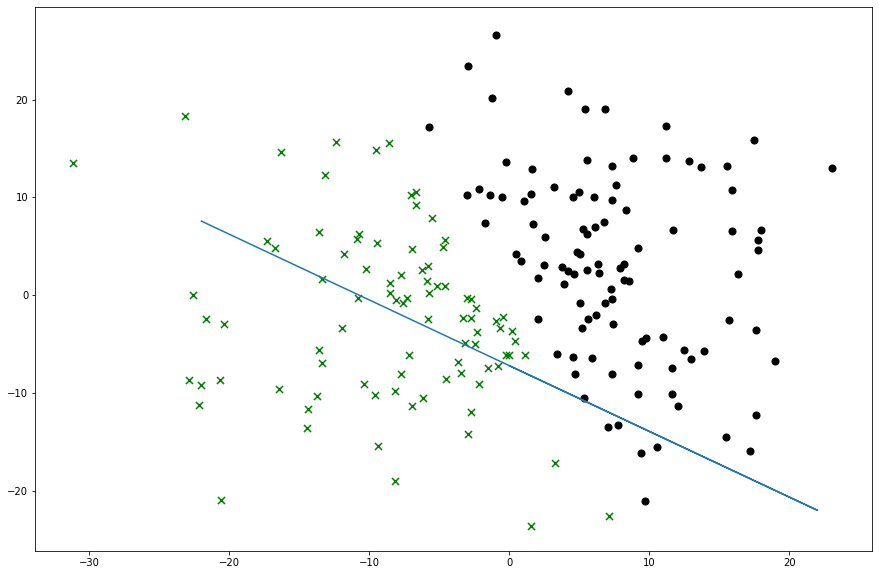

True line:[2 5 1], Estimated line: [ 511306.92440471  343877.16195186 3690036.2       ]
shifting point: epoch: 5, point : [7.43858111 6.77806855 1.        ], err: 0.0, num_errors_in_batch: 41


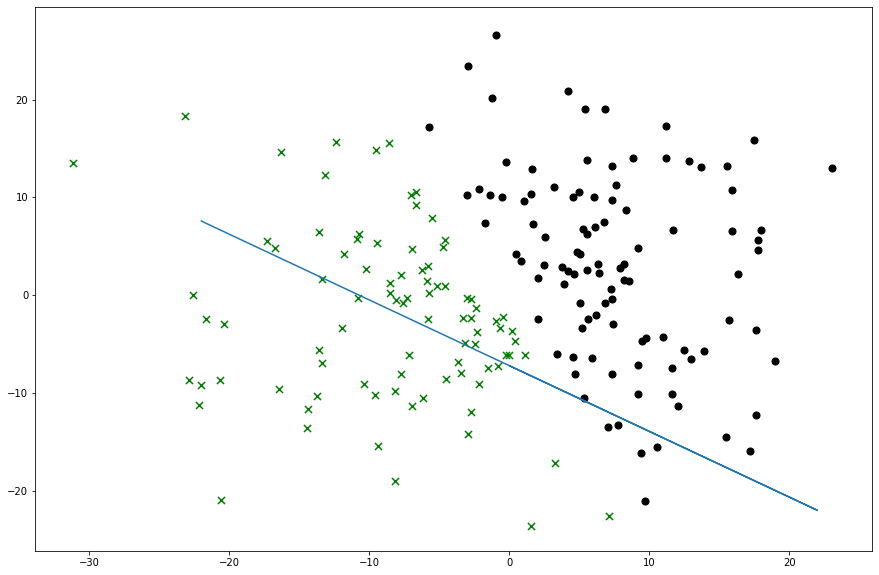

True line:[2 5 1], Estimated line: [ 511270.89068728  343921.47672472 3690030.2       ]
shifting point: epoch: 5, point : [ 15.64386671 -12.35141373   1.        ], err: -1.0, num_errors_in_batch: 47


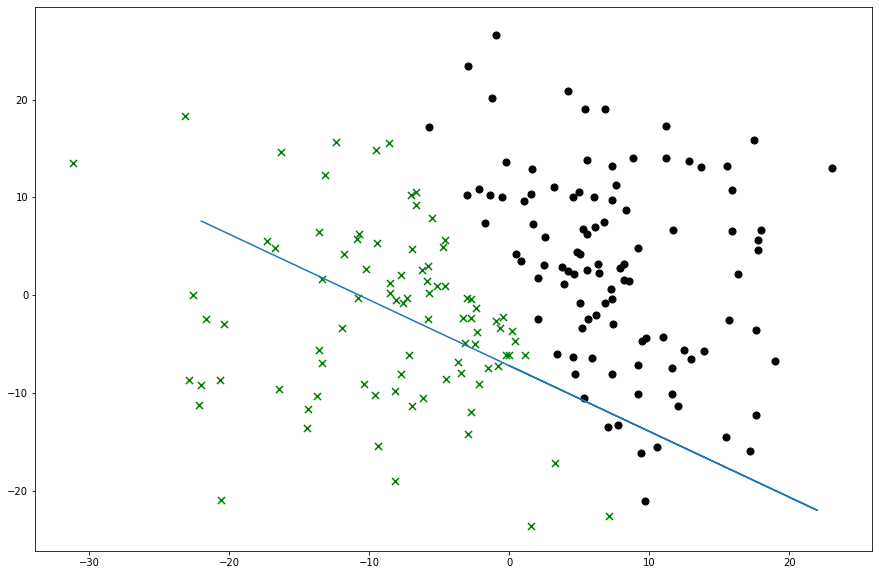

True line:[2 5 1], Estimated line: [ 596628.82875396  400908.58711087 4304912.4       ]
shifting point: epoch: 6, point : [135.  90. 972.], err: 632.6, num_errors_in_batch: 1


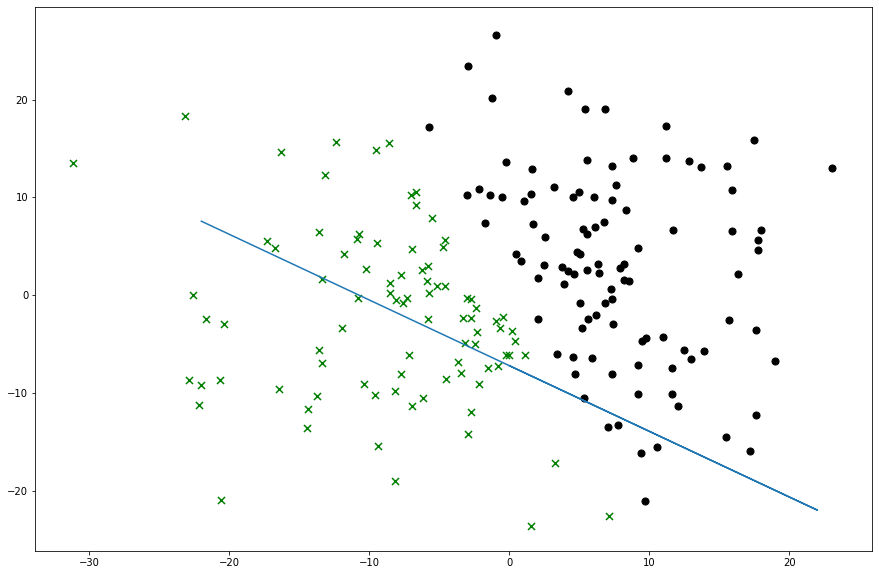

True line:[2 5 1], Estimated line: [ 596627.47030992  400939.65403637 4304905.4       ]
shifting point: epoch: 6, point : [-4.72619426  9.45612906  1.        ], err: 0.0, num_errors_in_batch: 8


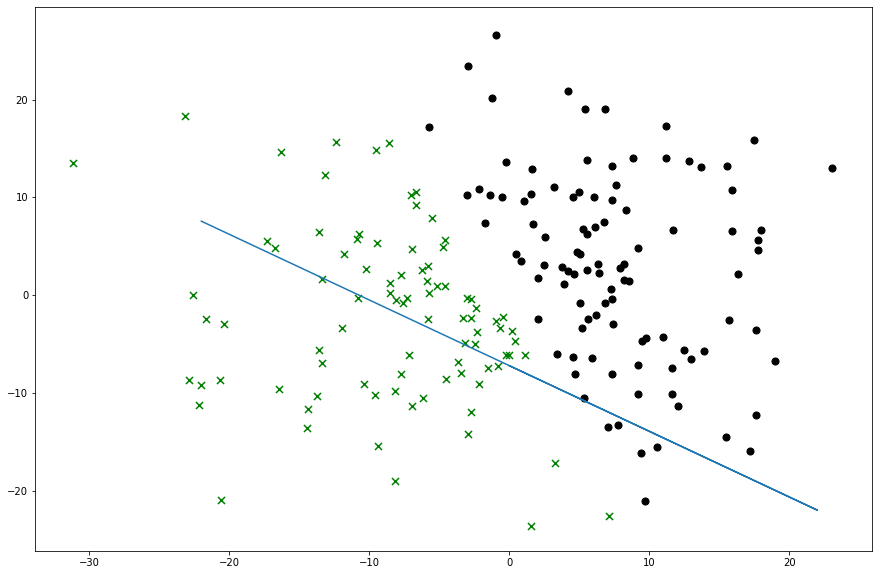

True line:[2 5 1], Estimated line: [ 596612.41758567  400968.9139665  4304902.4       ]
shifting point: epoch: 6, point : [9.59130713 1.05362112 1.        ], err: 0.0, num_errors_in_batch: 13


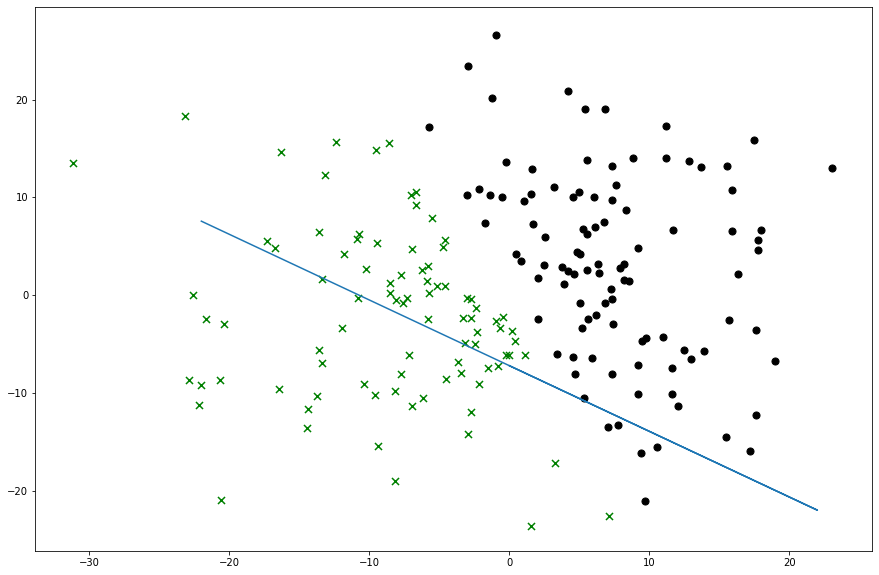

True line:[2 5 1], Estimated line: [ 596581.92054189  401005.8443245  4304901.4       ]
shifting point: epoch: 6, point : [6.30786881 5.53207821 1.        ], err: 0.0, num_errors_in_batch: 16


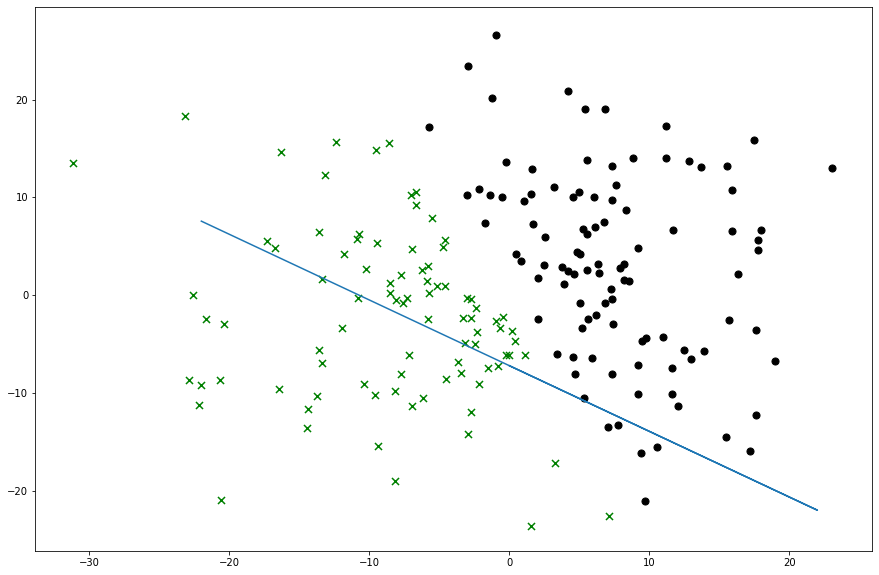

True line:[2 5 1], Estimated line: [ 596538.35671465  401046.15874096 4304897.4       ]
shifting point: epoch: 6, point : [-2.97065532  7.4015622   1.        ], err: 0.0, num_errors_in_batch: 22


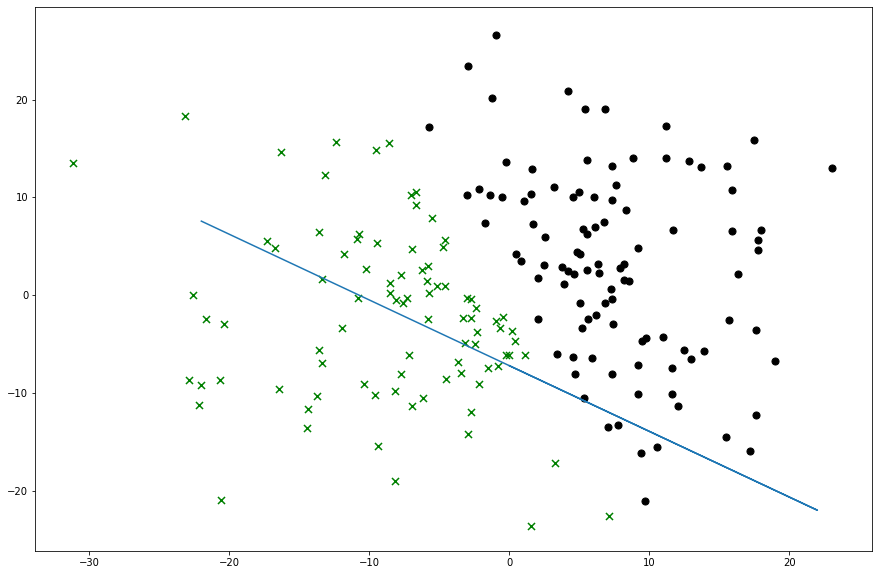

True line:[2 5 1], Estimated line: [ 596537.03925366  401077.15085383 4304892.4       ]
shifting point: epoch: 6, point : [-5.75180343 13.91444985  1.        ], err: 0.0, num_errors_in_batch: 27


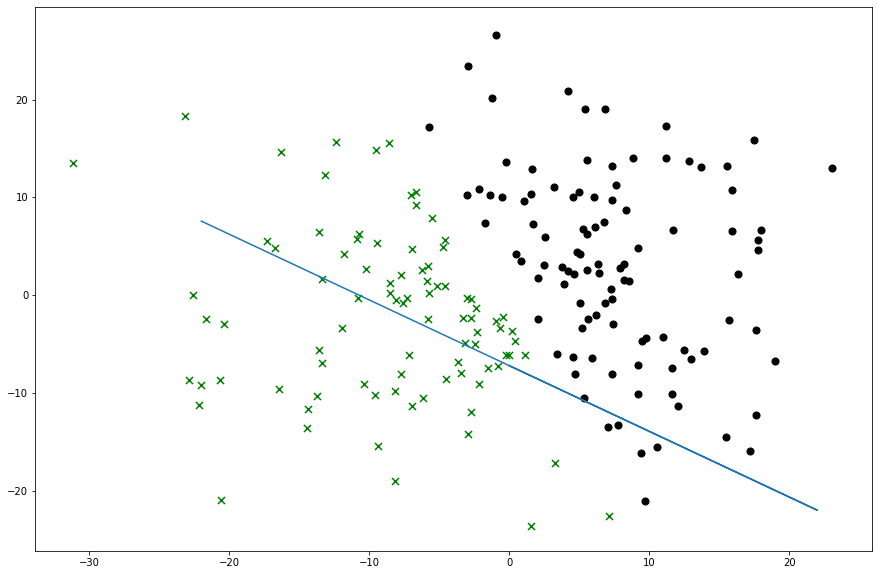

True line:[2 5 1], Estimated line: [ 596498.12549783  401134.12698948 4304887.4       ]
shifting point: epoch: 6, point : [-19.05206152  -8.14103399   1.        ], err: 0.0, num_errors_in_batch: 32


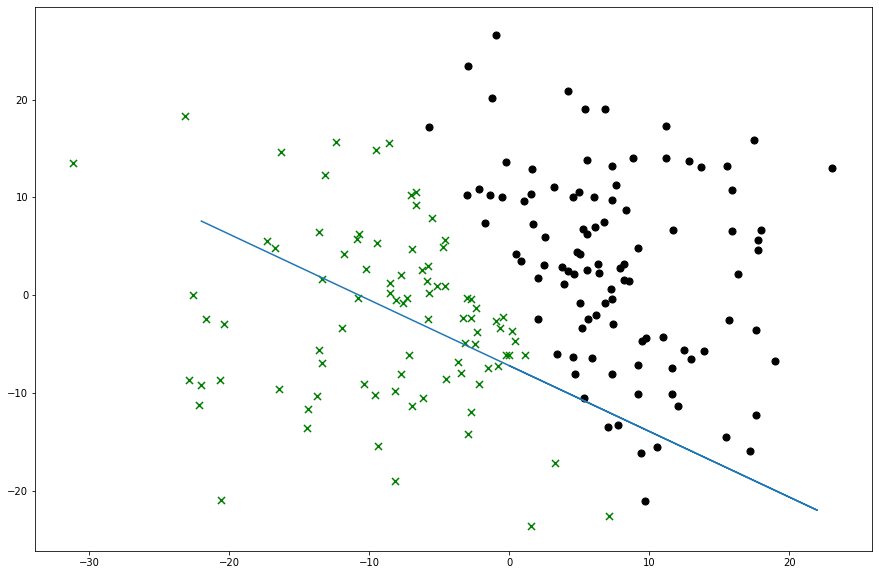

True line:[2 5 1], Estimated line: [ 596491.97345303  401167.93257935 4304881.4       ]
shifting point: epoch: 6, point : [-3.37628363 -0.66077225  1.        ], err: -1.0, num_errors_in_batch: 38


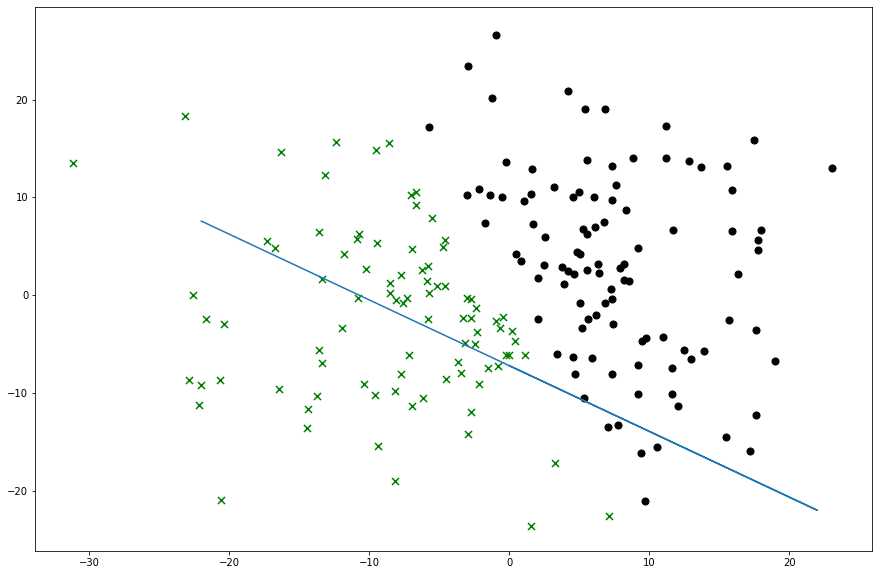

True line:[2 5 1], Estimated line: [ 596481.86191477  401208.87039735 4304875.4       ]
shifting point: epoch: 6, point : [-6.11485273  1.12773075  1.        ], err: -1.0, num_errors_in_batch: 44


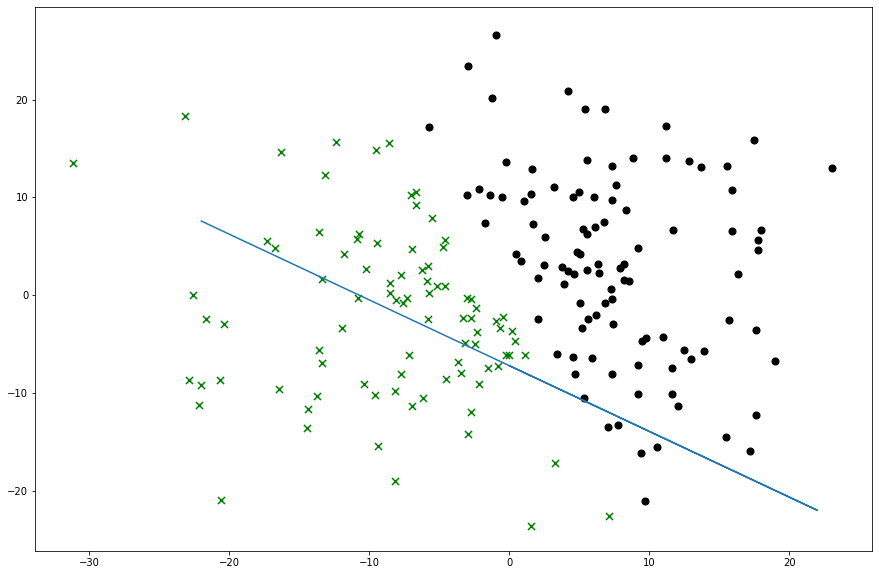

True line:[2 5 1], Estimated line: [ 596459.22836393  401242.70694668 4304869.4       ]
shifting point: epoch: 6, point : [-2.53013485 15.70624932  1.        ], err: 0.0, num_errors_in_batch: 50


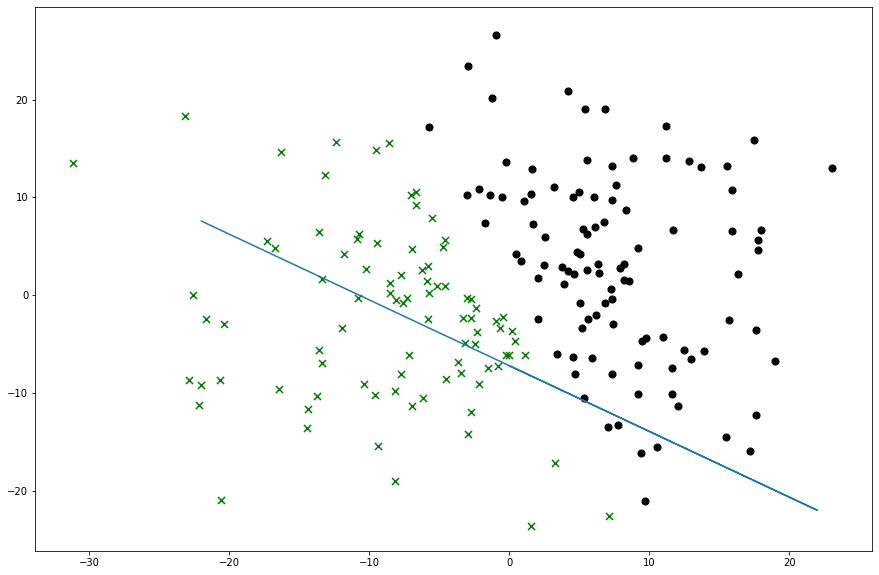

True line:[2 5 1], Estimated line: [ 681805.53171038  458232.86096545 4919752.6       ]
shifting point: epoch: 7, point : [14.04827582 11.19389821  1.        ], err: 0.0, num_errors_in_batch: 3


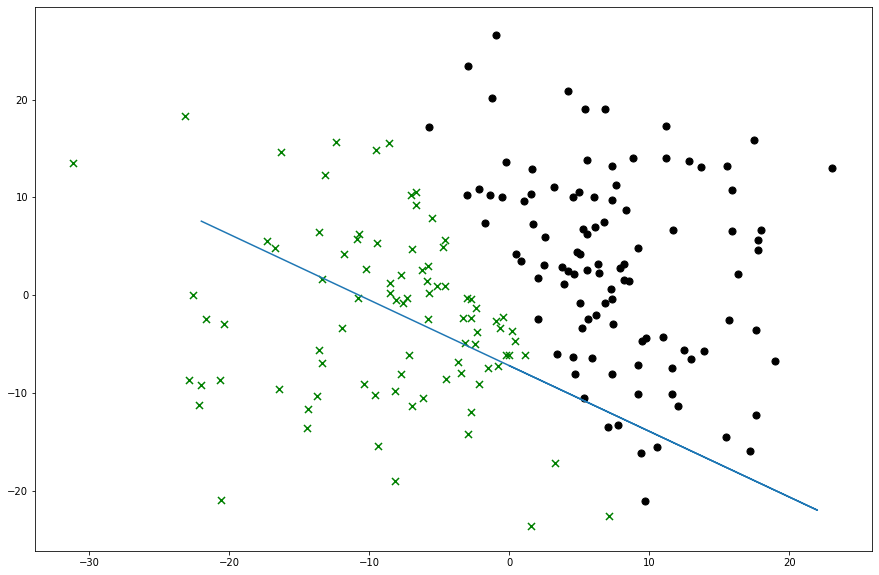

True line:[2 5 1], Estimated line: [ 681789.68022512  458274.2818284  4919746.6       ]
shifting point: epoch: 7, point : [-11.3104341   12.05738998   1.        ], err: 0.0, num_errors_in_batch: 11


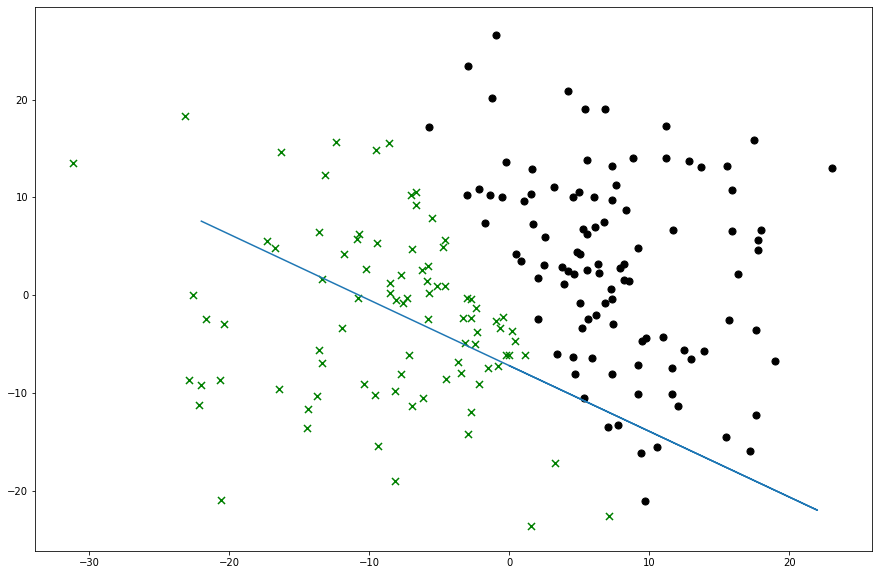

True line:[2 5 1], Estimated line: [ 681764.05866755  458319.94217631 4919743.6       ]
shifting point: epoch: 7, point : [ 2.17794467 16.30407068  1.        ], err: 0.0, num_errors_in_batch: 16


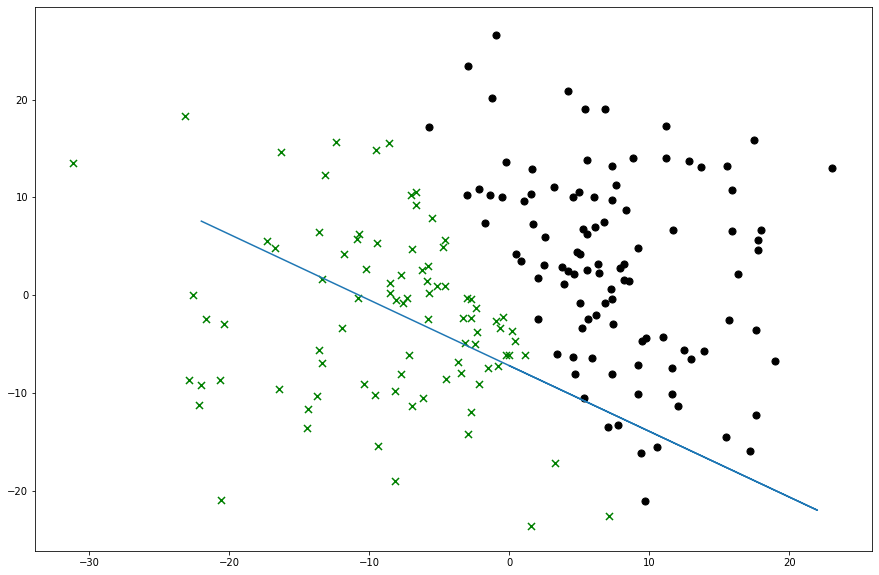

True line:[2 5 1], Estimated line: [ 681743.06806133  458344.71316256 4919739.6       ]
shifting point: epoch: 7, point : [-3.382029   5.2012413  1.       ], err: 0.0, num_errors_in_batch: 20


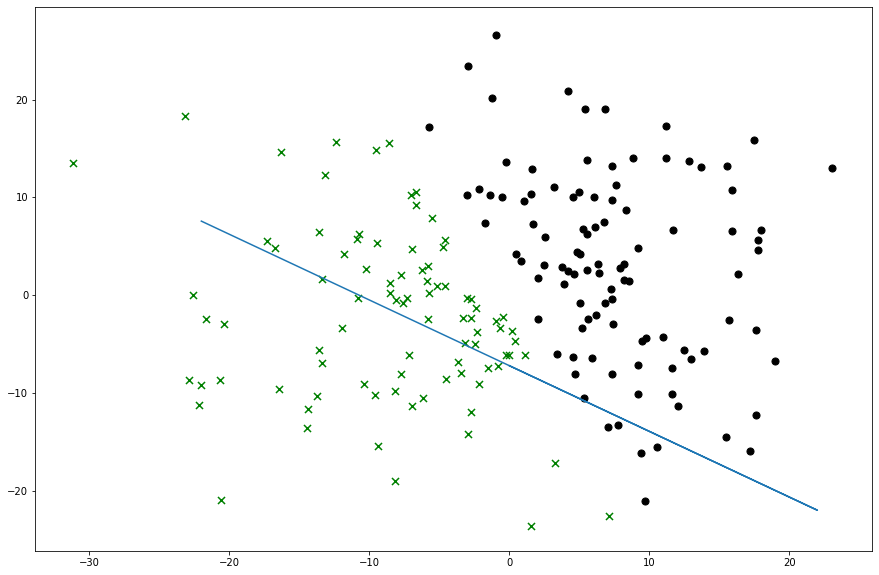

True line:[2 5 1], Estimated line: [ 681725.59313841  458377.61755661 4919735.6       ]
shifting point: epoch: 7, point : [-11.61621023 -14.35420055   1.        ], err: 0.0, num_errors_in_batch: 26


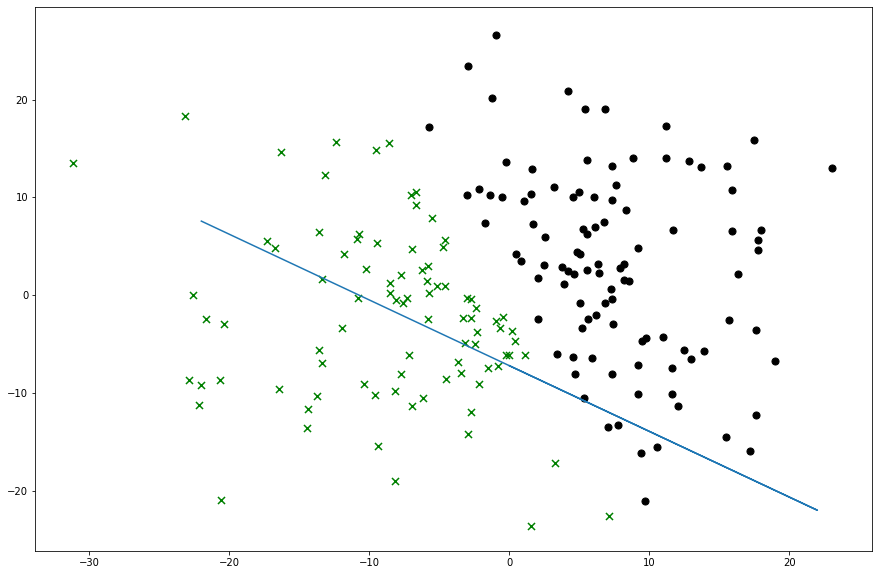

True line:[2 5 1], Estimated line: [ 681705.77245084  458409.70326022 4919732.6       ]
shifting point: epoch: 7, point : [1.10375896 3.8943703  1.        ], err: 0.0, num_errors_in_batch: 29


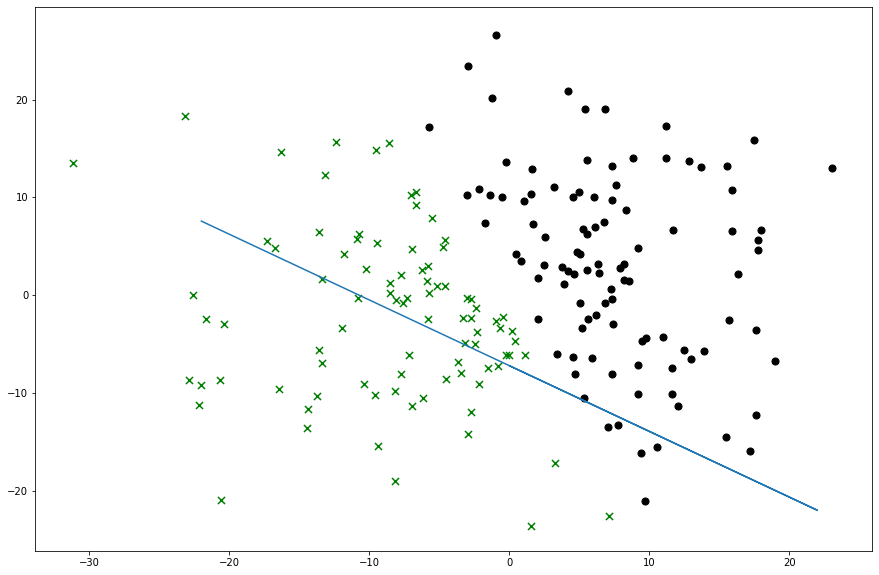

True line:[2 5 1], Estimated line: [ 681675.8169689  458464.5995783 4919726.6      ]
shifting point: epoch: 7, point : [-8.53669418 -4.50996197  1.        ], err: 0.0, num_errors_in_batch: 35


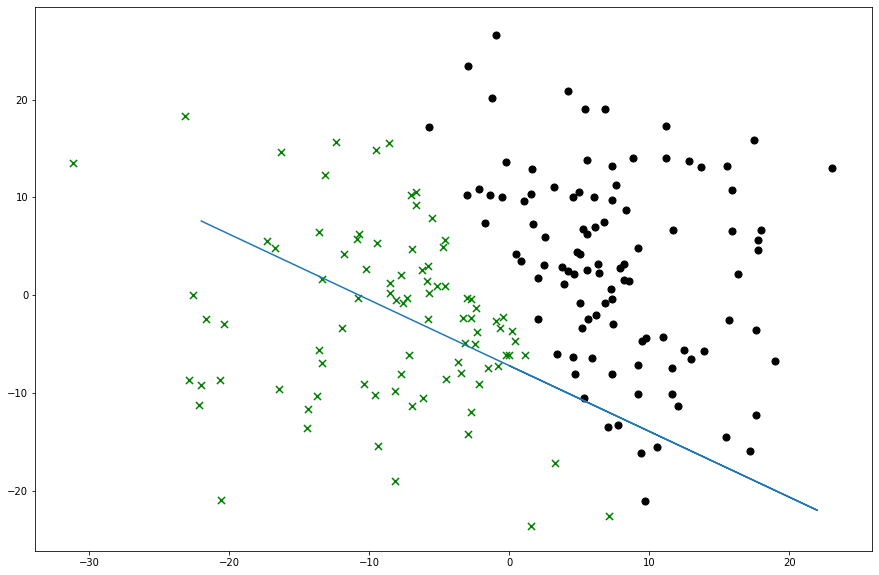

True line:[2 5 1], Estimated line: [ 681671.20065603  458505.35765548 4919720.6       ]
shifting point: epoch: 7, point : [7.43858111 6.77806855 1.        ], err: 0.0, num_errors_in_batch: 41


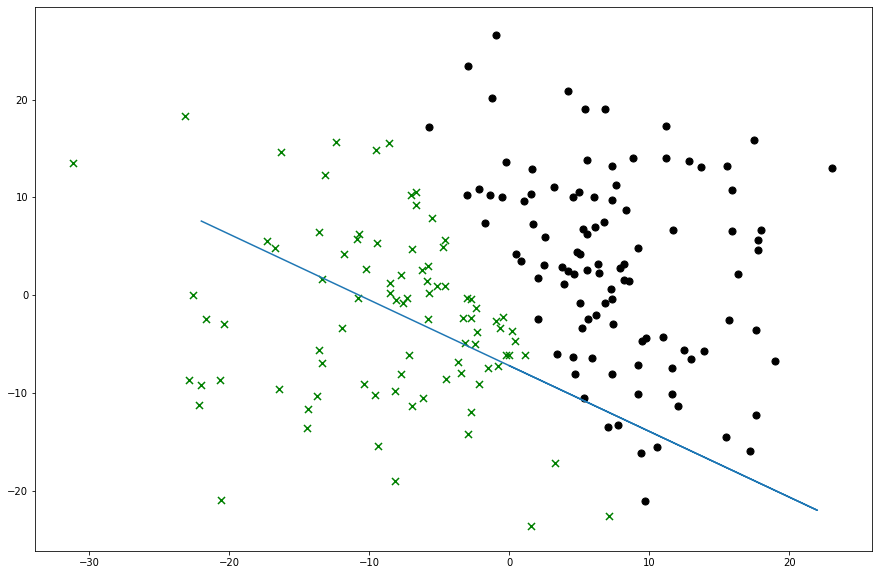

True line:[2 5 1], Estimated line: [ 681635.1669386   458549.67242834 4919714.6       ]
shifting point: epoch: 7, point : [ 15.64386671 -12.35141373   1.        ], err: -1.0, num_errors_in_batch: 47


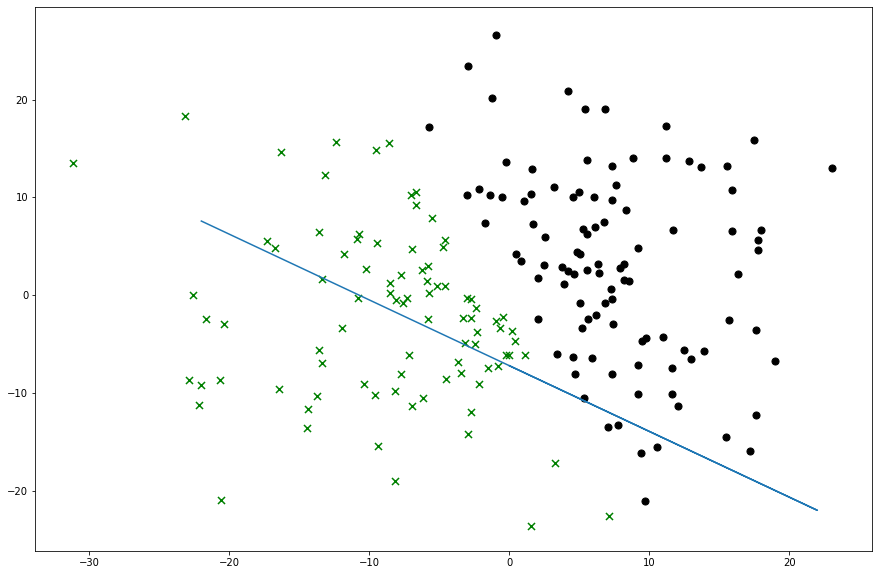

True line:[2 5 1], Estimated line: [ 766993.10500528  515536.78281449 5534596.8       ]
shifting point: epoch: 8, point : [135.  90. 972.], err: 632.6, num_errors_in_batch: 1


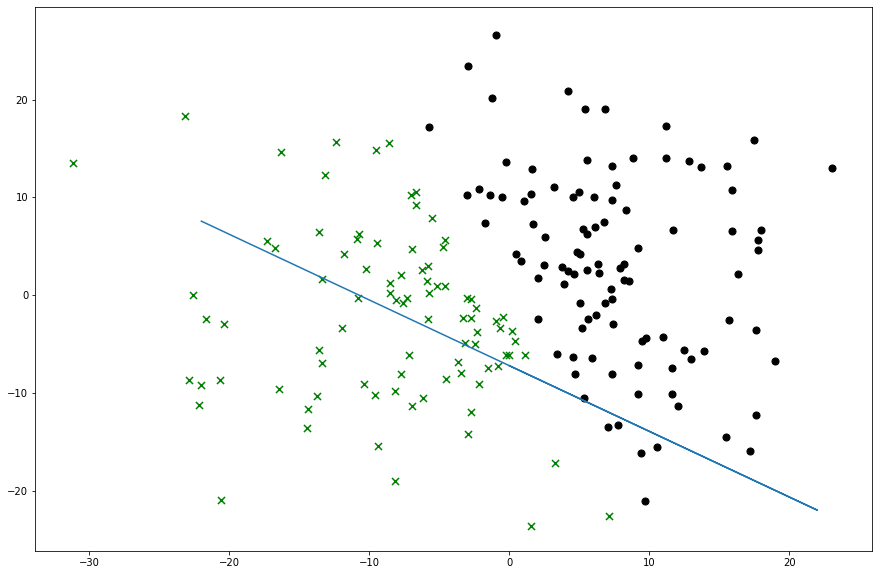

True line:[2 5 1], Estimated line: [ 766991.74656124  515567.84973999 5534589.8       ]
shifting point: epoch: 8, point : [-4.72619426  9.45612906  1.        ], err: 0.0, num_errors_in_batch: 8


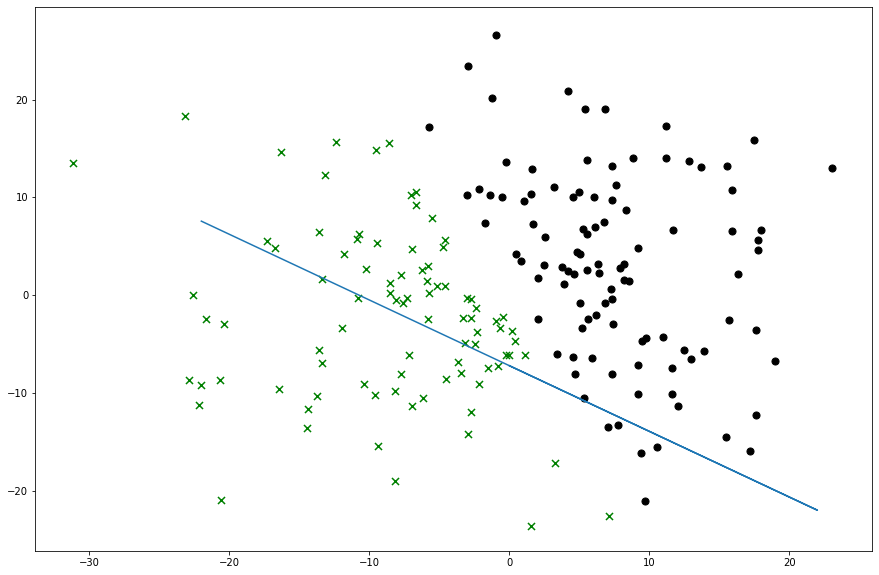

True line:[2 5 1], Estimated line: [ 766976.69383699  515597.10967012 5534586.8       ]
shifting point: epoch: 8, point : [9.59130713 1.05362112 1.        ], err: 0.0, num_errors_in_batch: 13


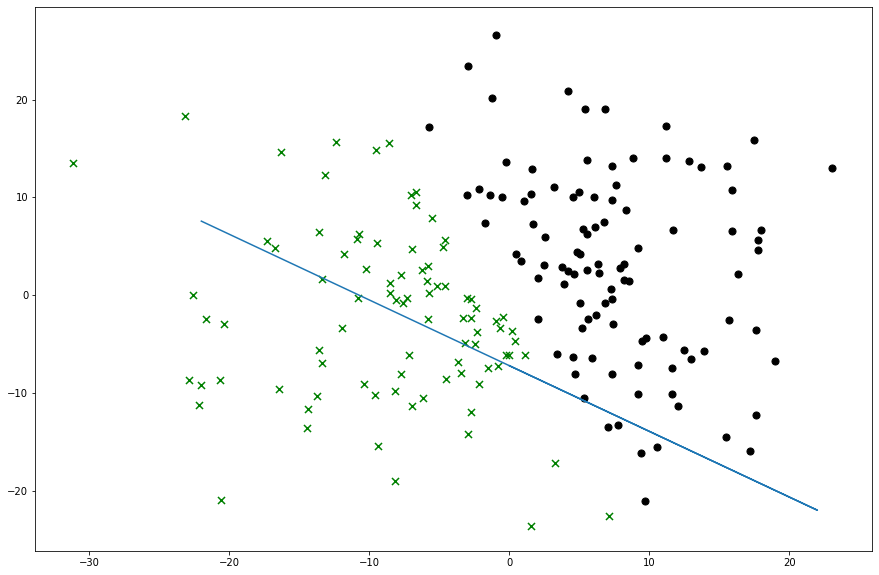

True line:[2 5 1], Estimated line: [ 766946.19679321  515634.04002812 5534585.8       ]
shifting point: epoch: 8, point : [6.30786881 5.53207821 1.        ], err: 0.0, num_errors_in_batch: 16


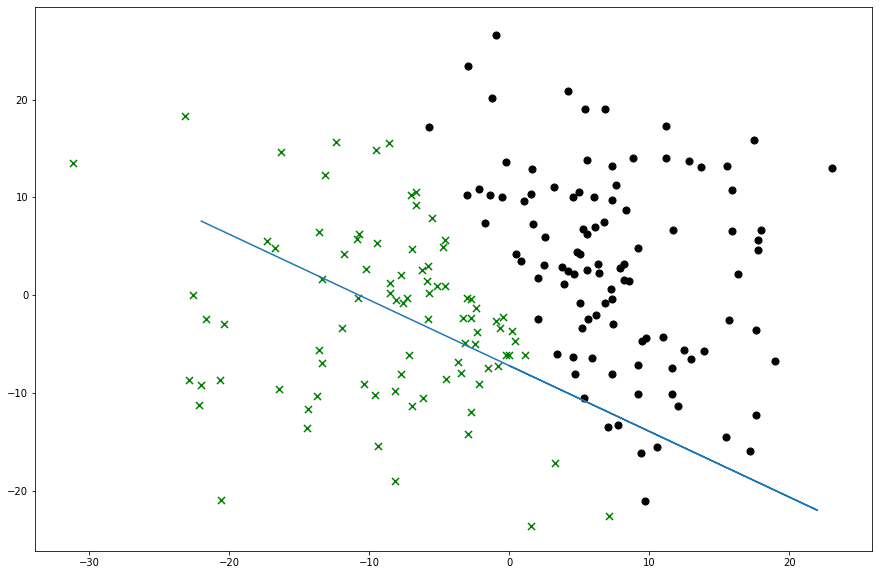

True line:[2 5 1], Estimated line: [ 766902.63296597  515674.35444458 5534581.8       ]
shifting point: epoch: 8, point : [-2.97065532  7.4015622   1.        ], err: 0.0, num_errors_in_batch: 22


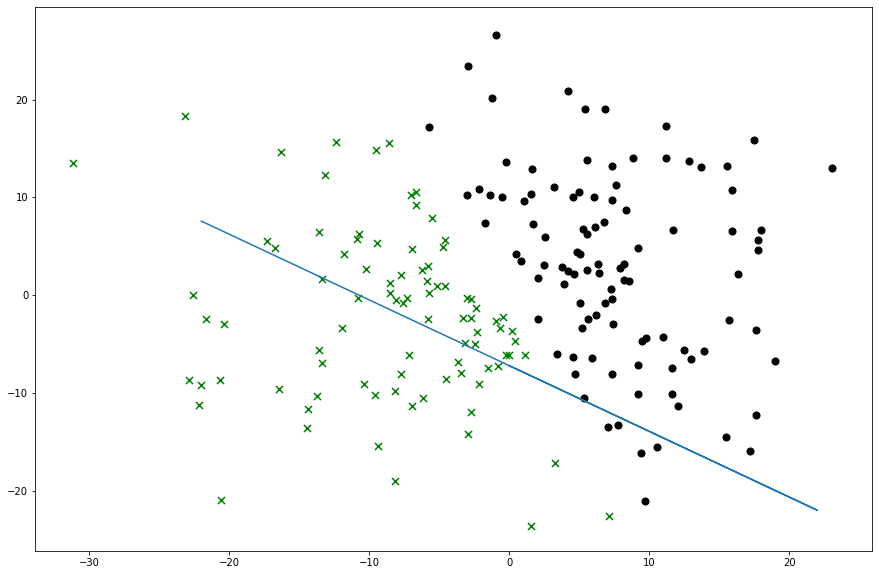

True line:[2 5 1], Estimated line: [ 766901.31550498  515705.34655745 5534576.8       ]
shifting point: epoch: 8, point : [-5.75180343 13.91444985  1.        ], err: 0.0, num_errors_in_batch: 27


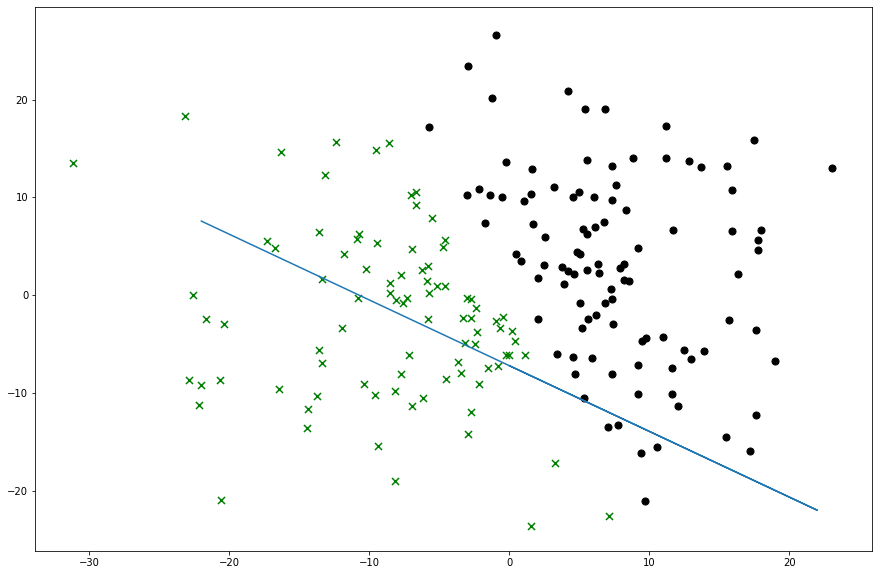

True line:[2 5 1], Estimated line: [ 766862.40174915  515762.3226931  5534571.8       ]
shifting point: epoch: 8, point : [-19.05206152  -8.14103399   1.        ], err: 0.0, num_errors_in_batch: 32


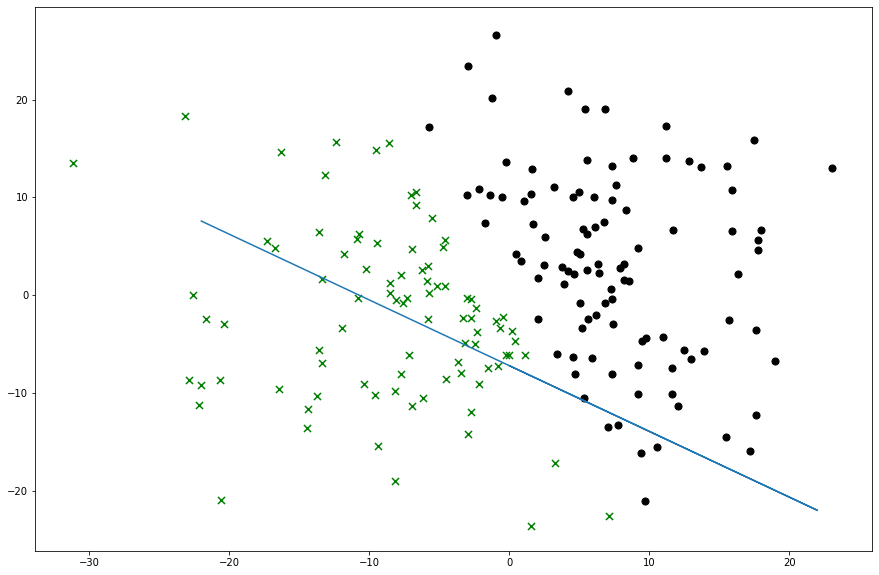

True line:[2 5 1], Estimated line: [ 766856.24970435  515796.12828297 5534565.8       ]
shifting point: epoch: 8, point : [-3.37628363 -0.66077225  1.        ], err: -1.0, num_errors_in_batch: 38


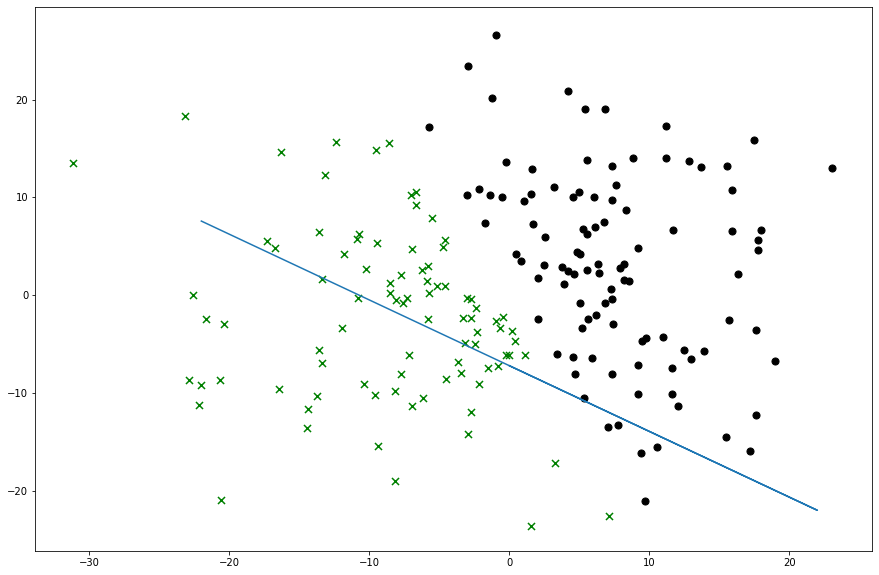

True line:[2 5 1], Estimated line: [ 766846.13816609  515837.06610097 5534559.8       ]
shifting point: epoch: 8, point : [-6.11485273  1.12773075  1.        ], err: -1.0, num_errors_in_batch: 44


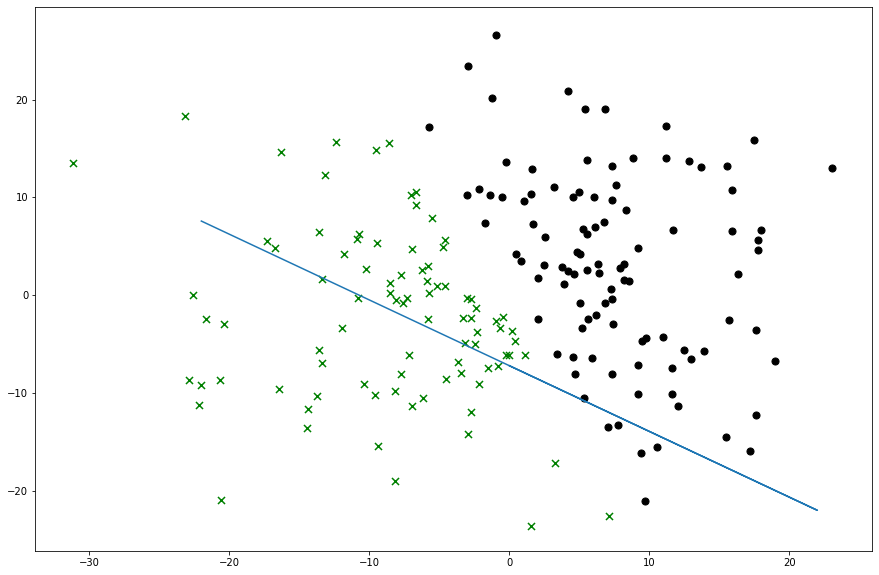

True line:[2 5 1], Estimated line: [ 766823.50461525  515870.9026503  5534553.8       ]
shifting point: epoch: 8, point : [-2.53013485 15.70624932  1.        ], err: 0.0, num_errors_in_batch: 50


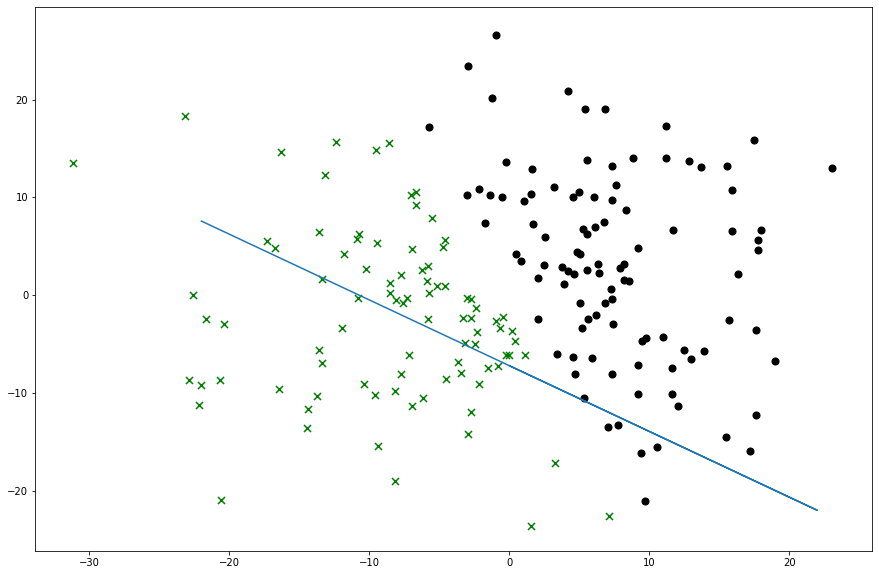

True line:[2 5 1], Estimated line: [ 852169.8079617   572861.05666908 6149437.        ]
shifting point: epoch: 9, point : [14.04827582 11.19389821  1.        ], err: 0.0, num_errors_in_batch: 3


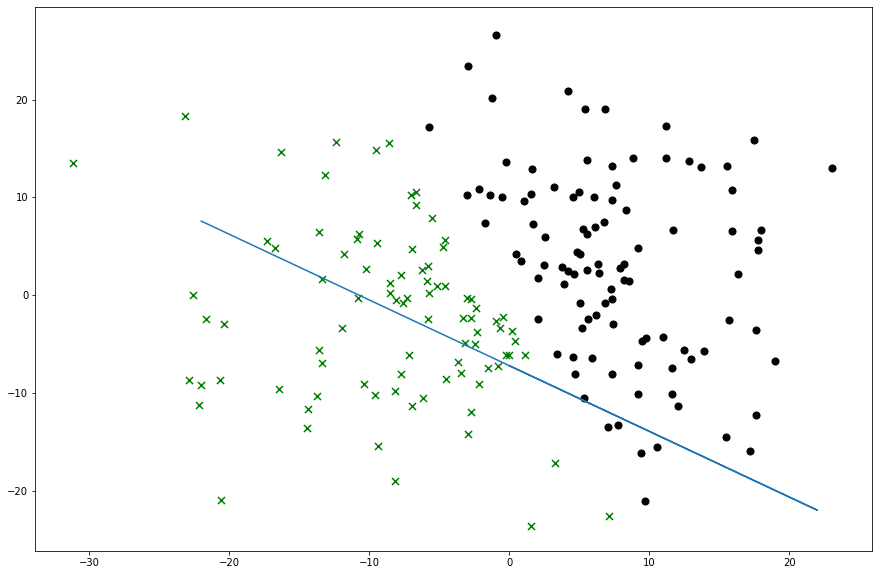

True line:[2 5 1], Estimated line: [ 852153.95647644  572902.47753202 6149431.        ]
shifting point: epoch: 9, point : [-11.3104341   12.05738998   1.        ], err: 0.0, num_errors_in_batch: 11


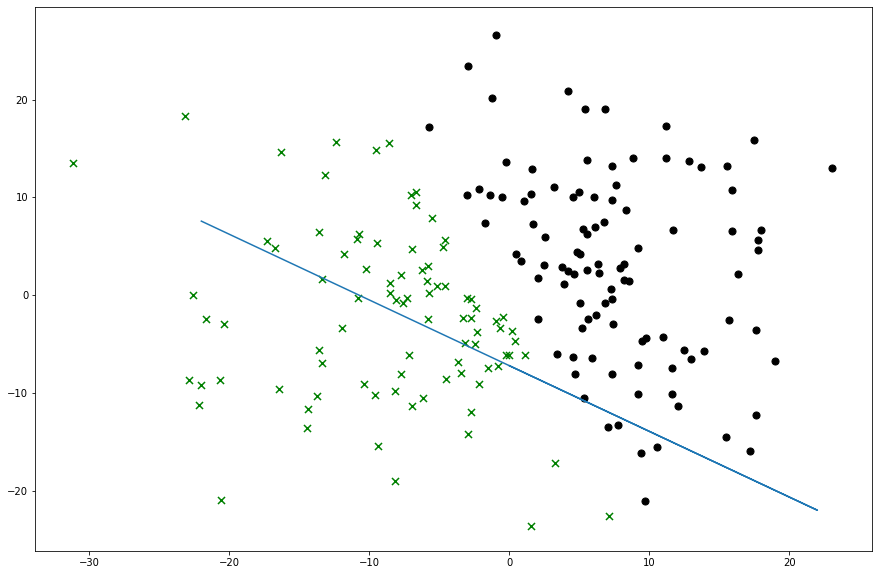

True line:[2 5 1], Estimated line: [ 852128.33491887  572948.13787993 6149428.        ]
shifting point: epoch: 9, point : [ 2.17794467 16.30407068  1.        ], err: 0.0, num_errors_in_batch: 16


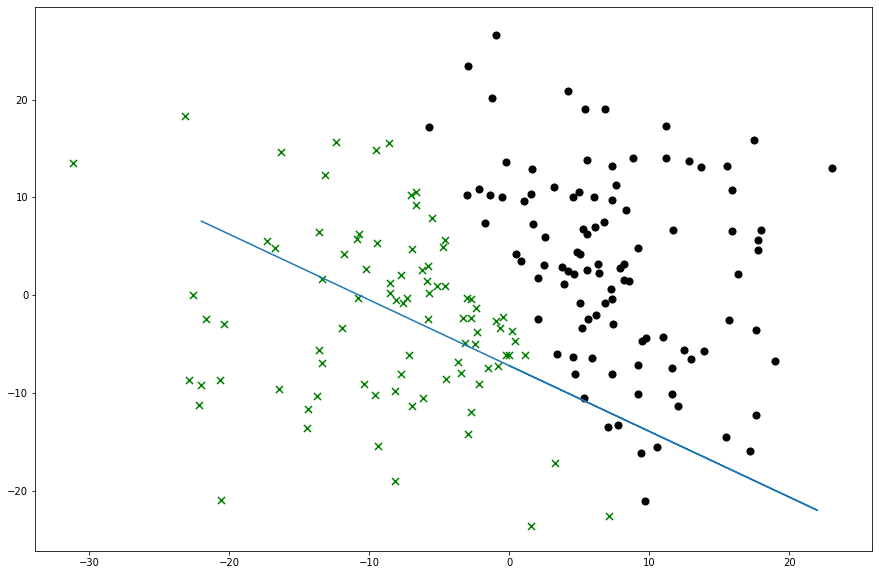

True line:[2 5 1], Estimated line: [ 852107.34431265  572972.90886618 6149424.        ]
shifting point: epoch: 9, point : [-3.382029   5.2012413  1.       ], err: 0.0, num_errors_in_batch: 20


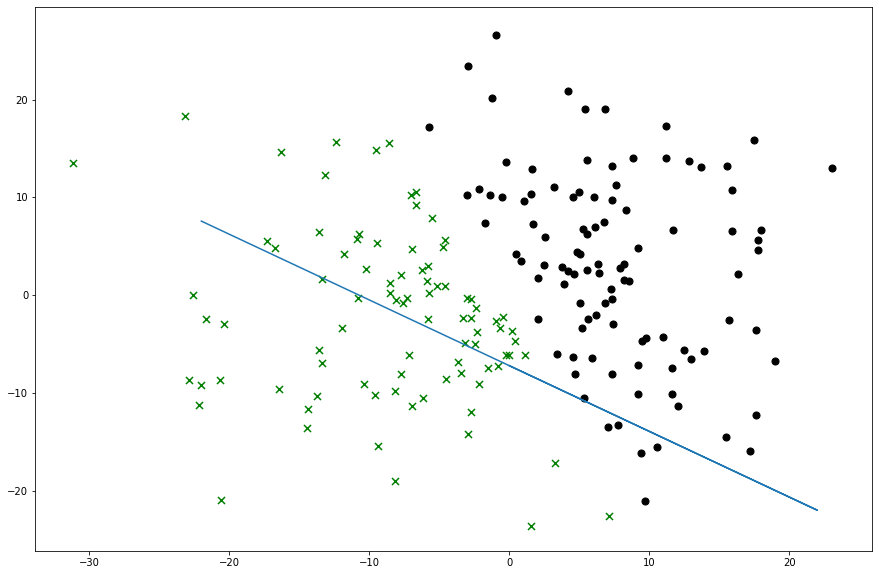

True line:[2 5 1], Estimated line: [ 852089.86938973  573005.81326023 6149420.        ]
shifting point: epoch: 9, point : [-11.61621023 -14.35420055   1.        ], err: 0.0, num_errors_in_batch: 26


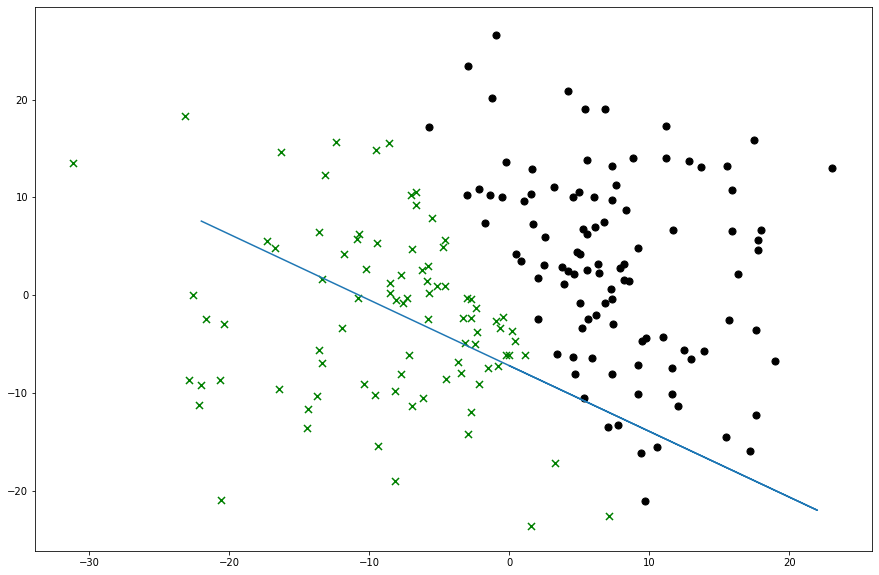

True line:[2 5 1], Estimated line: [ 852070.04870216  573037.89896385 6149417.        ]
shifting point: epoch: 9, point : [1.10375896 3.8943703  1.        ], err: 0.0, num_errors_in_batch: 29


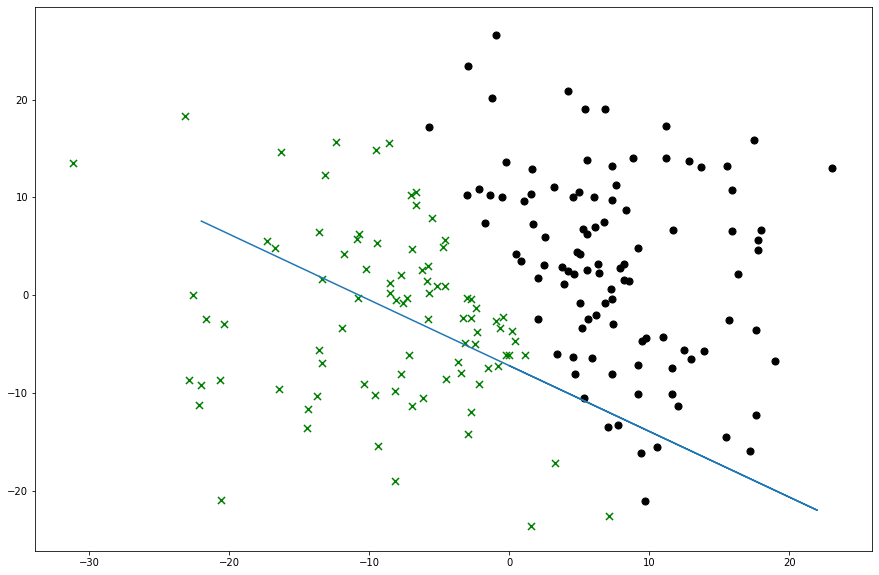

True line:[2 5 1], Estimated line: [ 852040.09322022  573092.79528192 6149411.        ]
shifting point: epoch: 9, point : [-8.53669418 -4.50996197  1.        ], err: 0.0, num_errors_in_batch: 35


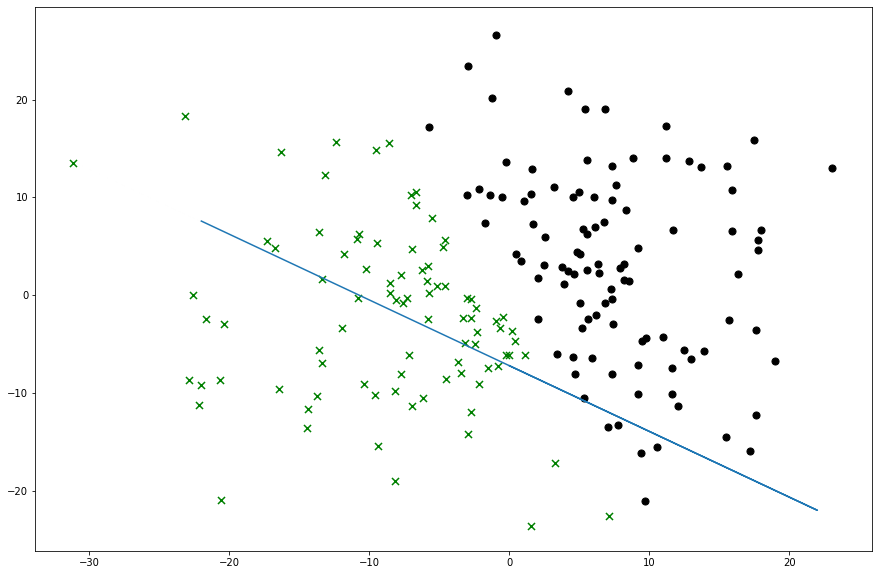

True line:[2 5 1], Estimated line: [ 852035.47690735  573133.5533591  6149405.        ]
shifting point: epoch: 9, point : [7.43858111 6.77806855 1.        ], err: 0.0, num_errors_in_batch: 41


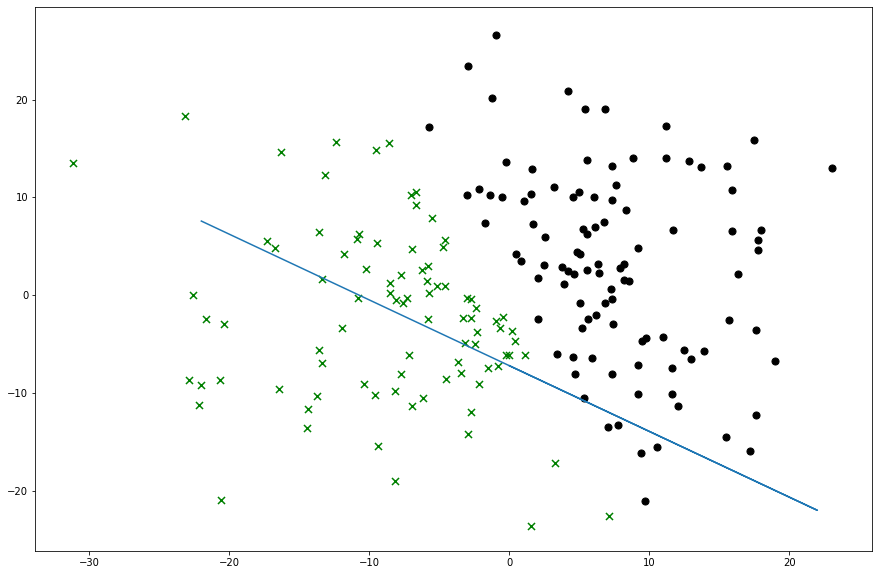

True line:[2 5 1], Estimated line: [ 851999.44318992  573177.86813196 6149399.        ]
shifting point: epoch: 9, point : [ 15.64386671 -12.35141373   1.        ], err: -1.0, num_errors_in_batch: 47


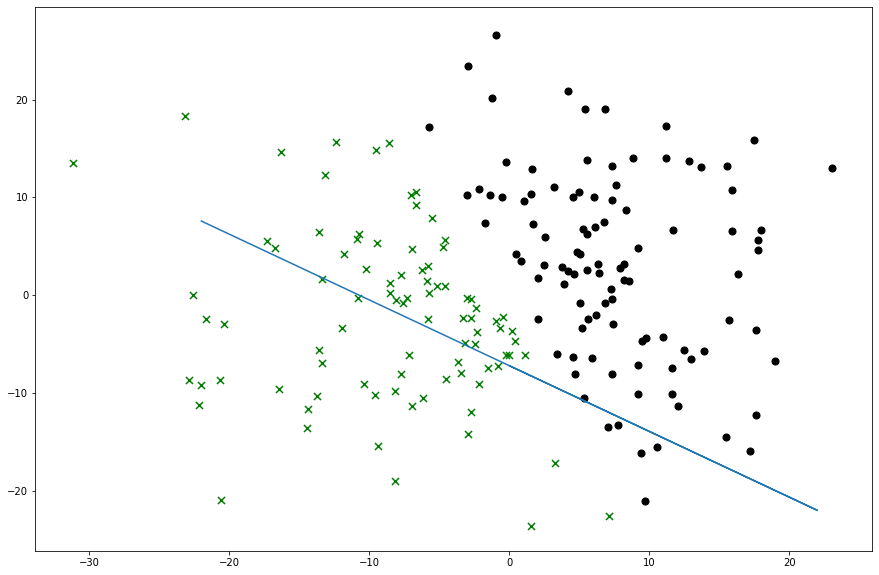

In [284]:
l = percept.fit(data, target)